# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

# Описание проекта  
Заказчик этого исследования — сеть отелей «Как в гостях».   
Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты.  
Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к   приезду гостя или просто не успеть найти другого клиента.  
Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони.  
Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит.  
Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

# Бизнес-метрика и другие данные    
Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.   
В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.     
Стоимость номеров отеля:      
категория A: за ночь — 1 000, разовое обслуживание — 400;    
категория B: за ночь — 800, разовое обслуживание — 350;    
категория C: за ночь — 600, разовое обслуживание — 350;    
категория D: за ночь — 550, разовое обслуживание — 150;    
категория E: за ночь — 500, разовое обслуживание — 150;    
категория F: за ночь — 450, разовое обслуживание — 150;    
категория G: за ночь — 350, разовое обслуживание — 150.    
В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.
На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

# Инструкция по выполнению проекта  

  - **Шаг 1. Откройте файлы с данными**    

  
  - **Шаг 2. Предобработка и исследовательский анализ данных**    

       * Проверьте данные и откорректируйте их, если потребуется.    
       * Проведите исследовательский анализ представленных данных. Опишите найденные особенности: пропуски, выбросы.    
         
 
  - **Шаг 3. Вычислите бизнес-метрику**  

       * Оцените прибыль отеля без внедрения депозитов.  
      
  
  - **Шаг 4. Разработка модели ML**    

      * Обучите разные модели и оцените их качество кросс-валидацией.  
        Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.    
      * Выберите метрику для обучения.    
      * Оцените прибыль, которую принесёт выбранная модель за год.    

  
  - **Шаг 5. Выявите признаки «ненадёжного» клиента**    

      * На основе исследовательского анализа данных опишите клиента, склонного к отказу от брони.
 
  
  - **Шаг 6. Напишите общий вывод**  
  
      * Опишите модель, которая решает задачу с наибольшей выгодой для бизнеса.   
        Дайте бизнесу рекомендации по результатам проделанной работы.

# Описание данных  

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:  
* id — номер записи;
* adults — количество взрослых постояльцев;
* arrival_date_year — год заезда;
* arrival_date_month — месяц заезда;
* arrival_date_week_number — неделя заезда;
* arrival_date_day_of_month — день заезда;
* babies — количество младенцев;
* booking_changes — количество изменений параметров заказа;
* children — количество детей от 3 до 14 лет;
* country — гражданство постояльца;
* customer_type — тип заказчика:
* Contract — договор с юридическим лицом;
* Group — групповой заезд;
* Transient — не связано с договором или групповым заездом;
* Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
* days_in_waiting_list — сколько дней заказ ожидал подтверждения;
* distribution_channel — канал дистрибуции заказа;
* is_canceled — отмена заказа;
* is_repeated_guest — признак того, что гость бронирует номер второй раз;
* lead_time — количество дней между датой бронирования и датой прибытия;
* meal — опции заказа:
* SC — нет дополнительных опций;
* BB — включён завтрак;
* HB — включён завтрак и обед;
* FB — включён завтрак, обед и ужин.
* previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
* previous_cancellations — количество отменённых заказов у клиента;
* required_car_parking_spaces — необходимость места для автомобиля;
* reserved_room_type — тип забронированной комнаты;
* stays_in_weekend_nights — количество ночей в выходные дни;
* stays_in_week_nights — количество ночей в будние дни;
* total_nights — общее количество ночей;
* total_of_special_requests — количество специальных отметок.

### Шаг 1. Откройте файлы с данными

In [1]:
!pip install scikit-learn==1.1.3
!pip install phik


     |████████████████████████████████| 30.8 MB 43 kB/s  eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 679 kB 1.2 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve, confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
import phik

import warnings
warnings.filterwarnings('ignore')

**Уберем экспонентациальные формы при выводе данных**

In [3]:
pd.set_option('display.float_format', '{:,.2f}'.format)

**Сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы**

In [4]:
pd.set_option('display.max_columns', None)

**Чтобы предупреждение SettingWithCopy не появлялось добавим строчку кода**

In [5]:
pd.options.mode.chained_assignment = None

**Примем значение аргумента random_state в переменной STATE**

In [6]:
STATE = np.random.RandomState(1234)

In [7]:
try:
    df_train = pd.read_csv('/datasets/hotel_train.csv')
except:
    df_train = pd.read_csv("C:/Задачи/YandexPracticum/hotel_train.csv")

In [8]:
try:
    df_test = pd.read_csv('/datasets/hotel_test.csv')
except:
    df_test = pd.read_csv("C:/Задачи/YandexPracticum/hotel_test.csv")

In [9]:
df_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.00,2015,July,27,1,0,1,1.00,0.00,0.00,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.00,2015,July,27,1,0,2,2.00,0.00,0.00,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.00,2015,July,27,1,0,2,2.00,0.00,0.00,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.00,2015,July,27,1,0,2,2.00,0.00,0.00,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.00,2015,July,27,1,0,3,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


In [10]:
df_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.00,2017,January,1,1,1,0,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.00,2017,January,1,1,2,2,1.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.00,2017,January,1,1,2,5,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

**Смотрим, одинаковы ли типы данных в датасетах**

In [13]:
df_train.dtypes == df_test.dtypes

id                                True
is_canceled                       True
lead_time                         True
arrival_date_year                 True
arrival_date_month                True
arrival_date_week_number          True
arrival_date_day_of_month         True
stays_in_weekend_nights           True
stays_in_week_nights              True
adults                            True
children                          True
babies                            True
meal                              True
country                           True
distribution_channel              True
is_repeated_guest                 True
previous_cancellations            True
previous_bookings_not_canceled    True
reserved_room_type                True
booking_changes                   True
days_in_waiting_list              True
customer_type                     True
required_car_parking_spaces       True
total_of_special_requests         True
total_nights                      True
dtype: bool

### Шаг 2. Предобработка и исследовательский анализ данных

**Проверка на явные дубликаты**

In [14]:
print(f'\nЯвных дубликатов в данных для обучения модели: {df_train.duplicated().sum()}')


Явных дубликатов в данных для обучения модели: 0


In [15]:
print(f'\nЯвных дубликатов в данных для тестирования модели: {df_test.duplicated().sum()}')


Явных дубликатов в данных для тестирования модели: 0


**Поиск пропущенных значений**

In [16]:
print('\nПропусков в данных для обучения модели\n')
print(df_train.isna().sum())


Пропусков в данных для обучения модели

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64


In [17]:
print('\nПропусков в данных для тестирования модели\n')
print(df_test.isna().sum())


Пропусков в данных для тестирования модели

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64


**Удалим из каждого датафрейма столбец id. Он не несет значимости для модели.**

In [18]:
df_train.drop(columns='id', inplace=True)
df_test.drop(columns='id', inplace=True)

**Проверим категориальные столбцы на скрытые дубликаты**

In [19]:
categorical_columns = df_train.loc[:,  (df_train.dtypes == 'object')].columns

In [20]:
datas = [df_train, df_test] 
for data in datas:
    for column in categorical_columns:
        print(sorted(data[column].unique()))
        print(f'Количество уникальных значений {column}:', data[column].nunique())

['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
Количество уникальных значений arrival_date_month: 12
['BB       ', 'FB       ', 'HB       ', 'SC', 'SC       ']
Количество уникальных значений meal: 5
['ABW', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATA', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GGY', 'GIB', 'GLP', 'GNB', 'GRC', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KNA', 'KOR', 'KWT', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MUS', 'MWI', 'MYS', 'NAM

**Как видим, число уникальных значений в столбце meal должно быть 4, но их 5, они не совпадают, из-за пробелов. Также есть пробелы в столбце reserved_room_type**

In [21]:
datas = [df_train, df_test]
for data in datas:
    for column in ['meal', 'reserved_room_type']:
        data[column] = data[column].str.strip()
        print(sorted(data[column].unique()))
        print(f'Количество уникальных значений {column}:', data[column].nunique())

['BB', 'FB', 'HB', 'SC']
Количество уникальных значений meal: 4
['A', 'B', 'C', 'D', 'E', 'F', 'G']
Количество уникальных значений reserved_room_type: 7
['BB', 'FB', 'HB', 'SC']
Количество уникальных значений meal: 4
['A', 'B', 'C', 'D', 'E', 'F', 'G']
Количество уникальных значений reserved_room_type: 7


**Проверим невозможные бронирования**

**Только дети, без взрослых**

In [22]:
df_train.query('(children > 0 | babies > 0) & adults == 0').shape[0]

151

In [23]:
df_test.query('(children > 0 | babies > 0) & adults == 0').shape[0]

62

**Отбросим эти значения**

In [24]:
df_train.drop(df_train.query('(children > 0 | babies > 0) & adults == 0').index, inplace=True)

In [25]:
df_test.drop(df_test.query('(children > 0 | babies > 0) & adults == 0').index, inplace=True)

**Заселения без постояльцев**

In [26]:
df_train.query('adults == 0').shape[0]

15

In [27]:
df_test.query('adults == 0').shape[0]

7

**Отбросим эти значения**

In [28]:
df_train.drop(df_train.query('adults == 0').index, inplace=True)

In [29]:
df_test.drop(df_test.query('adults == 0').index, inplace=True)

**Функция для опредлеения времени года**

In [30]:
def season(month):
    if month == 'October' or month == 'September' or month == 'November':
        return 'autumn'
    if month == 'August' or month == 'July' or month == 'June':
            return 'summer'
    if month == 'April' or month == 'May' or month == 'March':
        return 'spring'
    if month == 'January' or month == 'February' or month == 'December':
        return 'winter'
df_train['season'] = df_train['arrival_date_month'].apply(season)
df_test['season'] = df_test['arrival_date_month'].apply(season)

**Проверим на дубликаты без столбца id**

In [31]:
print(f'Дубликатов в hotel_train: {round(df_train.duplicated().mean() * 100, 2)}%')
print(f'Дубликатов в hotel_test: {round(df_test.duplicated().mean() * 100, 2)}%')

Дубликатов в hotel_train: 32.85%
Дубликатов в hotel_test: 23.85%


**После удаления столбца id обнаружилось значительно количество полных дубликатов. Выяснить их природу без связи с человеком выгружавшим данные не представляется возможным. Но это вполне могли быть несколько бронирований, сделанных одним клиентом в один день. Проверить наверняка мы это не можем. Поэтому удалять не будем**

**Визуализация процента отмененных и не отмененных бронирований**

In [32]:
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(15, 5)}, palette=colors) #Задам настройки таблиц

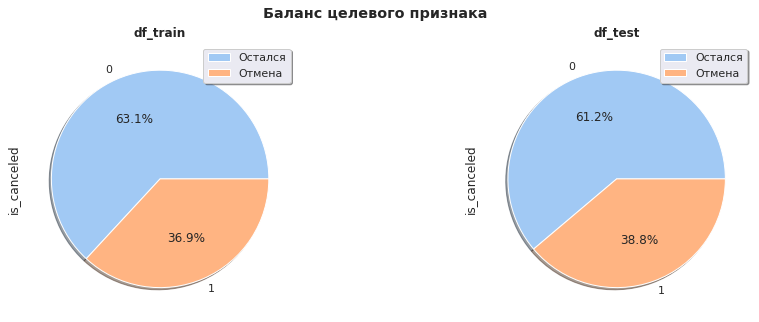

In [33]:
datas = [df_train, df_test]
titles = ['df_train', 'df_test']
fig, ax = plt.subplots(1, 2)
fig.suptitle('Баланс целевого признака', fontweight="bold")
AX = 0
for data in datas:
    data.is_canceled.value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%', ax=ax[AX])
    ax[AX].legend(['Остался', 'Отмена'], shadow=True)
    ax[AX].set_title(titles[AX], fontweight="bold")
    AX += 1
plt.show()

**Посмотрим на матрицу корреляции между целевым признаком отменой брони и другими признаками**

In [34]:
df_train.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
is_canceled,1.00,0.33,-0.03,0.01,-0.00,-0.01,0.01,0.04,-0.02,-0.03,-0.04,0.15,-0.05,-0.14,0.08,-0.19,-0.26,0.00
lead_time,0.33,1.00,-0.02,0.09,-0.01,0.05,0.17,0.12,-0.06,-0.02,-0.09,0.14,-0.06,-0.01,0.21,-0.12,-0.15,0.16
arrival_date_year,-0.03,-0.02,1.00,-0.39,0.01,-0.01,0.01,0.03,0.05,-0.01,-0.01,-0.13,0.04,0.04,0.03,0.02,0.09,0.01
arrival_date_week_number,0.01,0.09,-0.39,1.00,0.05,0.03,0.03,0.00,-0.01,0.00,-0.01,0.01,-0.01,0.01,-0.05,-0.01,0.08,0.04
arrival_date_day_of_month,-0.00,-0.01,0.01,0.05,1.00,-0.00,0.00,0.01,0.02,-0.00,-0.01,-0.03,-0.00,0.02,0.02,0.00,0.01,0.00
stays_in_weekend_nights,-0.01,0.05,-0.01,0.03,-0.00,1.00,0.20,0.12,0.03,0.02,-0.08,-0.01,-0.03,0.02,-0.07,-0.02,0.08,0.64
stays_in_week_nights,0.01,0.17,0.01,0.03,0.00,0.20,1.00,0.12,0.02,0.02,-0.09,-0.01,-0.05,0.06,0.04,-0.03,0.09,0.88
adults,0.04,0.12,0.03,0.00,0.01,0.12,0.12,1.00,0.05,0.02,-0.16,0.00,-0.12,-0.05,-0.02,0.01,0.18,0.16
children,-0.02,-0.06,0.05,-0.01,0.02,0.03,0.02,0.05,1.00,0.02,-0.03,-0.03,-0.02,0.05,-0.04,0.05,0.11,0.03
babies,-0.03,-0.02,-0.01,0.00,-0.00,0.02,0.02,0.02,0.02,1.00,-0.01,-0.01,-0.01,0.08,-0.01,0.03,0.10,0.02


In [35]:
df_test.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
is_canceled,1.00,0.24,NaN,0.04,-0.01,-0.00,0.05,0.08,0.01,-0.04,-0.13,-0.03,-0.07,-0.14,0.02,-0.17,-0.22,0.04
lead_time,0.24,1.00,NaN,0.35,0.03,0.16,0.29,0.20,0.04,0.00,-0.17,-0.06,-0.09,0.03,0.07,-0.10,0.03,0.31
arrival_date_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,0.04,0.35,NaN,1.00,0.12,0.06,0.08,0.12,0.03,-0.00,-0.06,-0.01,-0.01,0.02,-0.01,-0.04,0.06,0.10
arrival_date_day_of_month,-0.01,0.03,NaN,0.12,1.00,0.00,-0.03,-0.02,0.01,-0.00,0.01,0.00,0.01,-0.00,-0.01,0.01,-0.01,-0.02
stays_in_weekend_nights,-0.00,0.16,NaN,0.06,0.00,1.00,0.17,0.11,0.05,0.02,-0.09,-0.04,-0.05,0.01,0.01,-0.03,0.04,0.63
stays_in_week_nights,0.05,0.29,NaN,0.08,-0.03,0.17,1.00,0.15,0.03,0.03,-0.11,-0.04,-0.06,0.04,0.02,-0.05,0.04,0.88
adults,0.08,0.20,NaN,0.12,-0.02,0.11,0.15,1.00,0.04,0.02,-0.21,-0.10,-0.14,-0.06,-0.00,-0.02,0.13,0.17
children,0.01,0.04,NaN,0.03,0.01,0.05,0.03,0.04,1.00,0.03,-0.03,-0.02,-0.02,0.04,-0.01,0.03,0.06,0.05
babies,-0.04,0.00,NaN,-0.00,-0.00,0.02,0.03,0.02,0.03,1.00,-0.00,-0.00,-0.01,0.09,-0.00,0.04,0.07,0.03


interval columns not set, guessing: ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights']


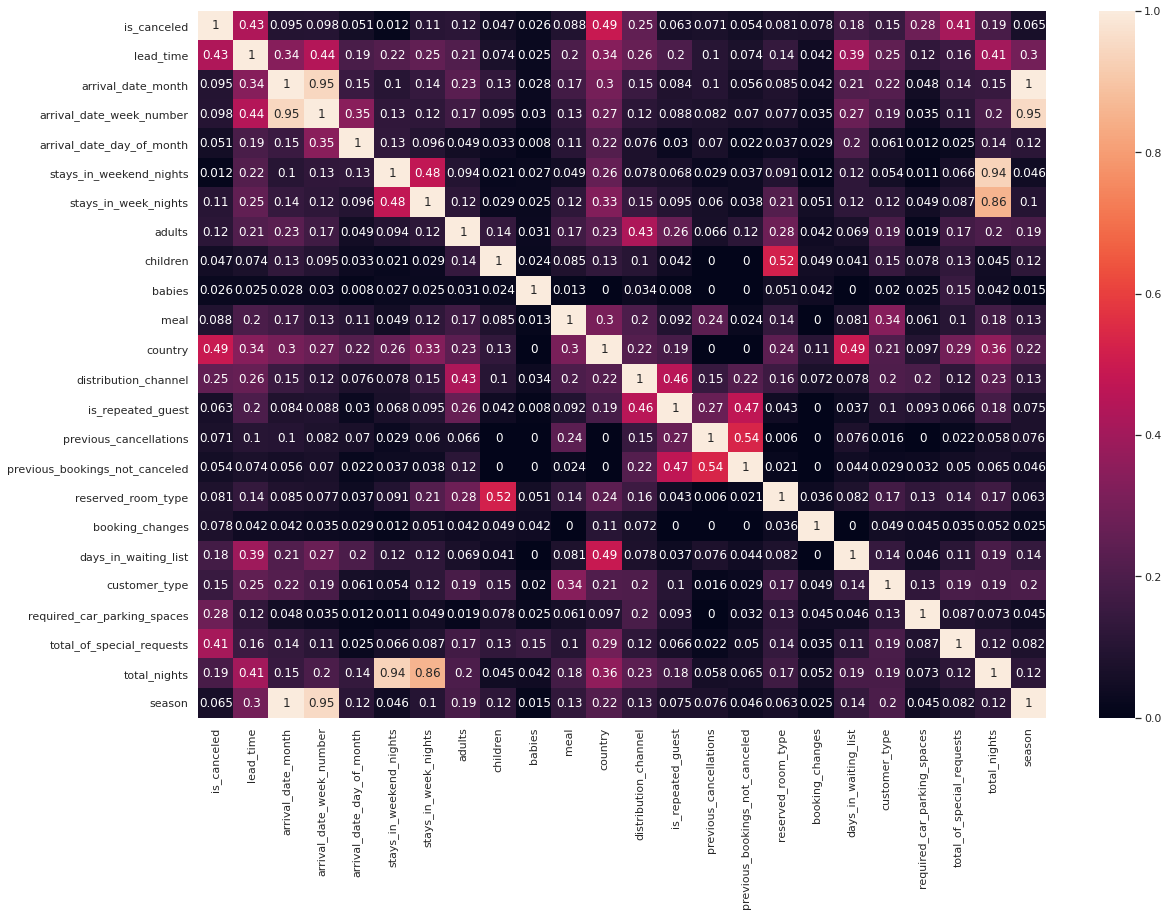

In [36]:
plt.figure(figsize=(19,13))
phik_overview = df_train.drop('arrival_date_year', axis = 1).phik_matrix()
sns.heatmap(phik_overview.round(3), annot = True)
plt.show()

interval columns not set, guessing: ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights']


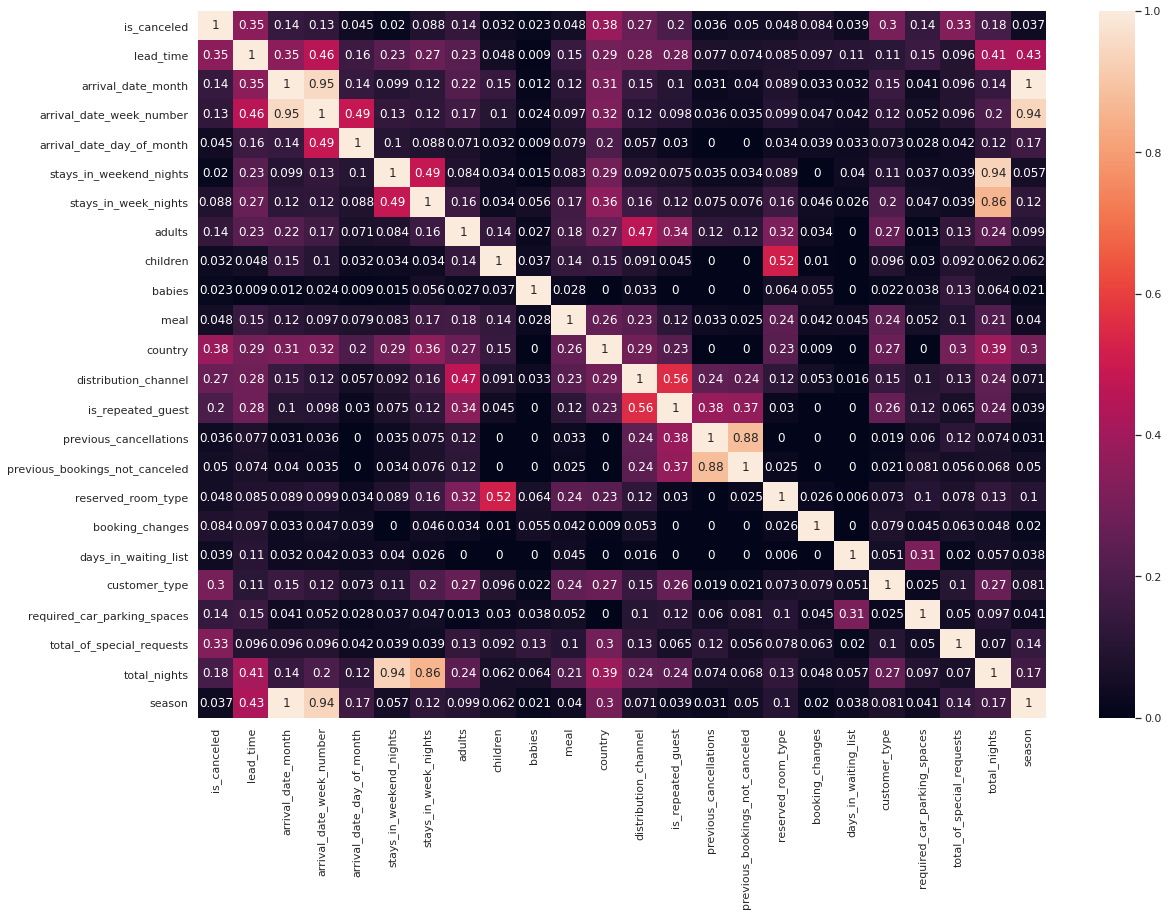

In [37]:
plt.figure(figsize=(19,13))
phik_overview = df_test.drop('arrival_date_year', axis = 1).phik_matrix()
sns.heatmap(phik_overview.round(3), annot = True)
plt.show()

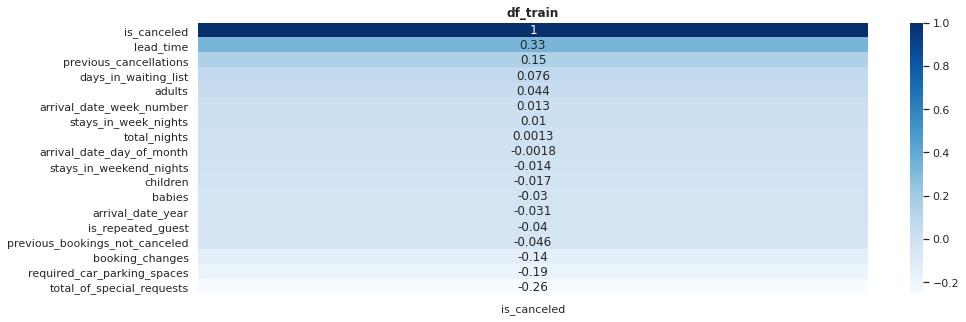

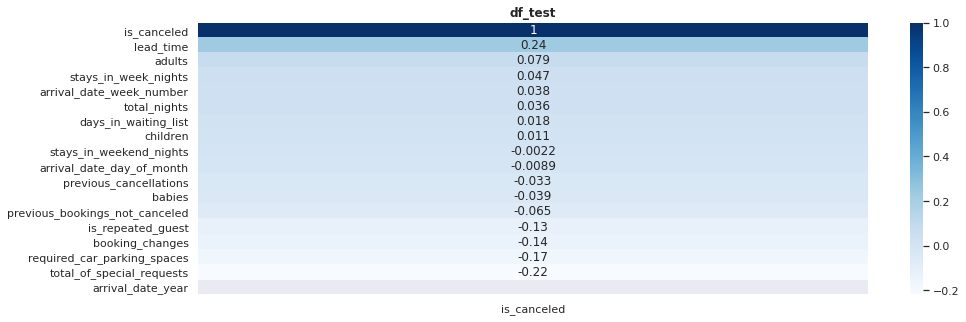

In [38]:
datas = [df_train, df_test]
AX = 0
for data in datas:
    sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False),
                annot = True, annot_kws = {"size":12}, cmap='Blues')
    plt.title(titles[AX], fontweight="bold")
    AX += 1
    plt.show()

**Гистограммы признаков**

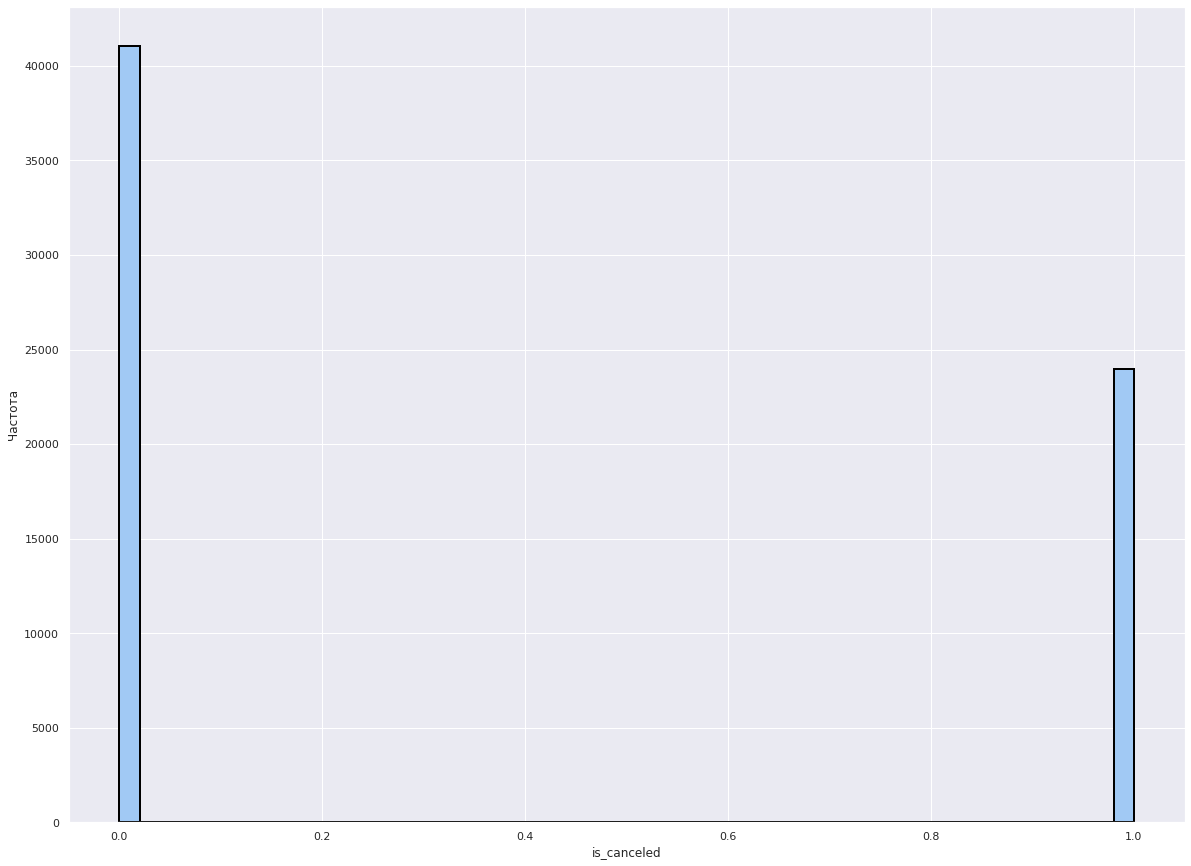

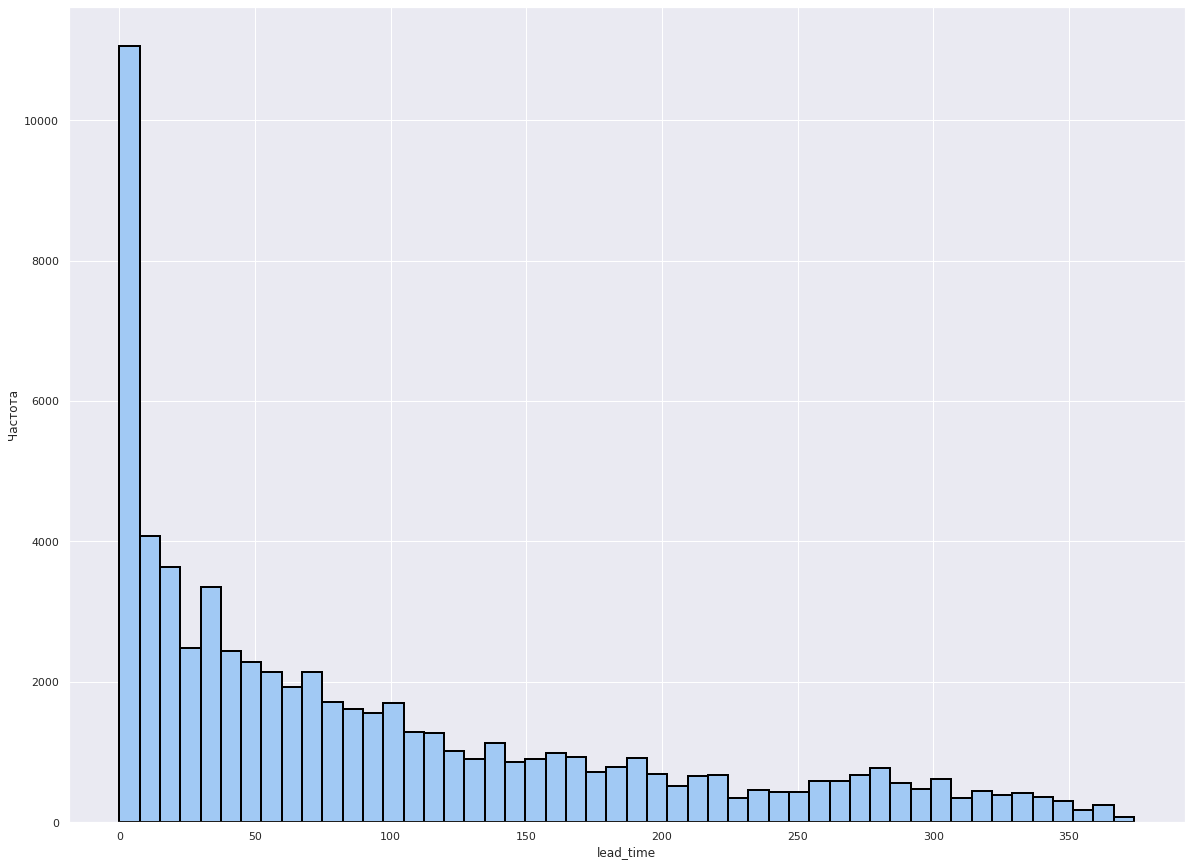

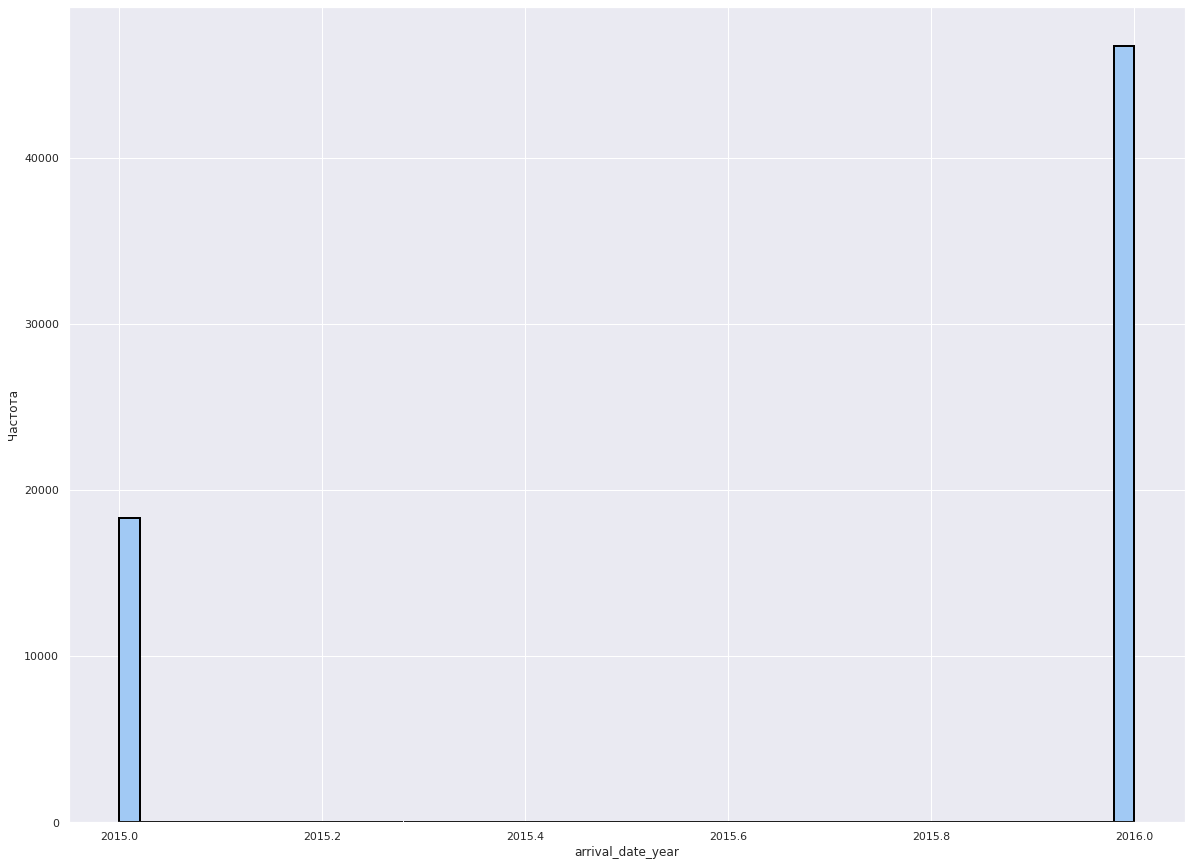

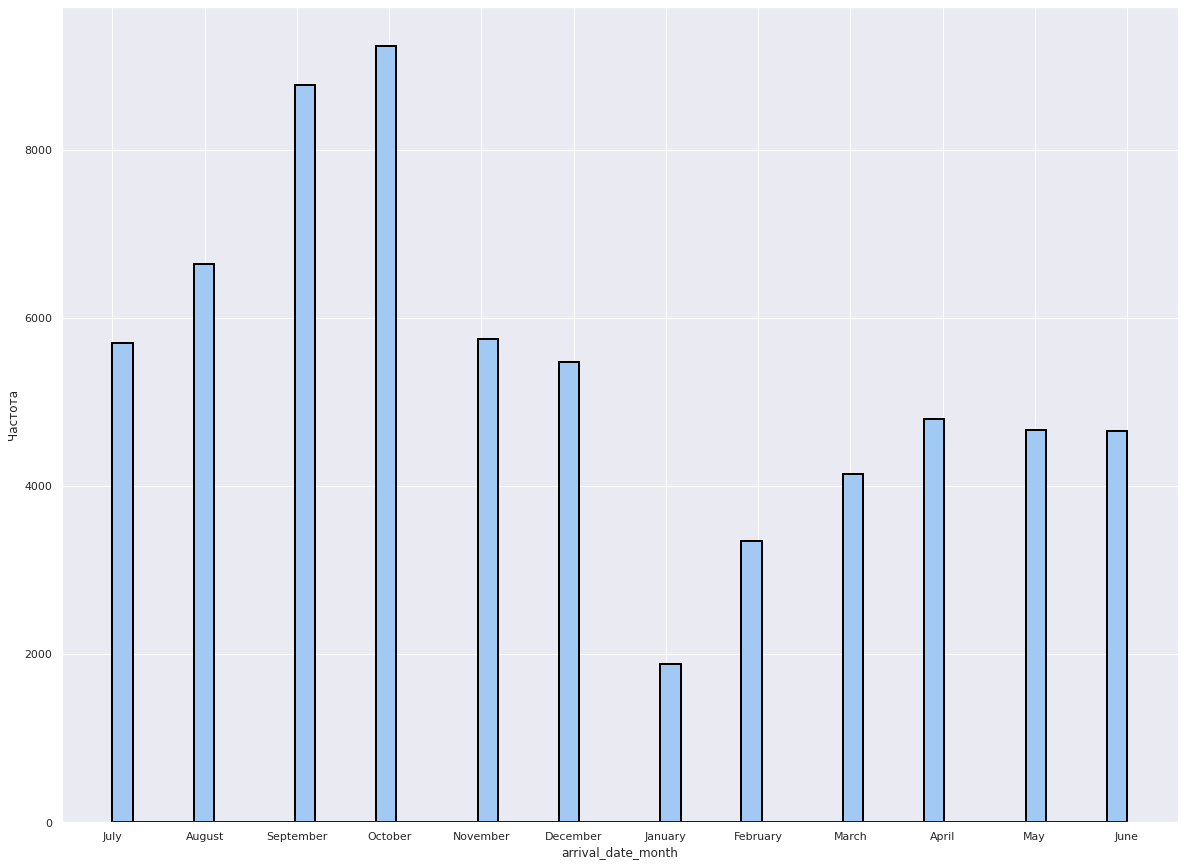

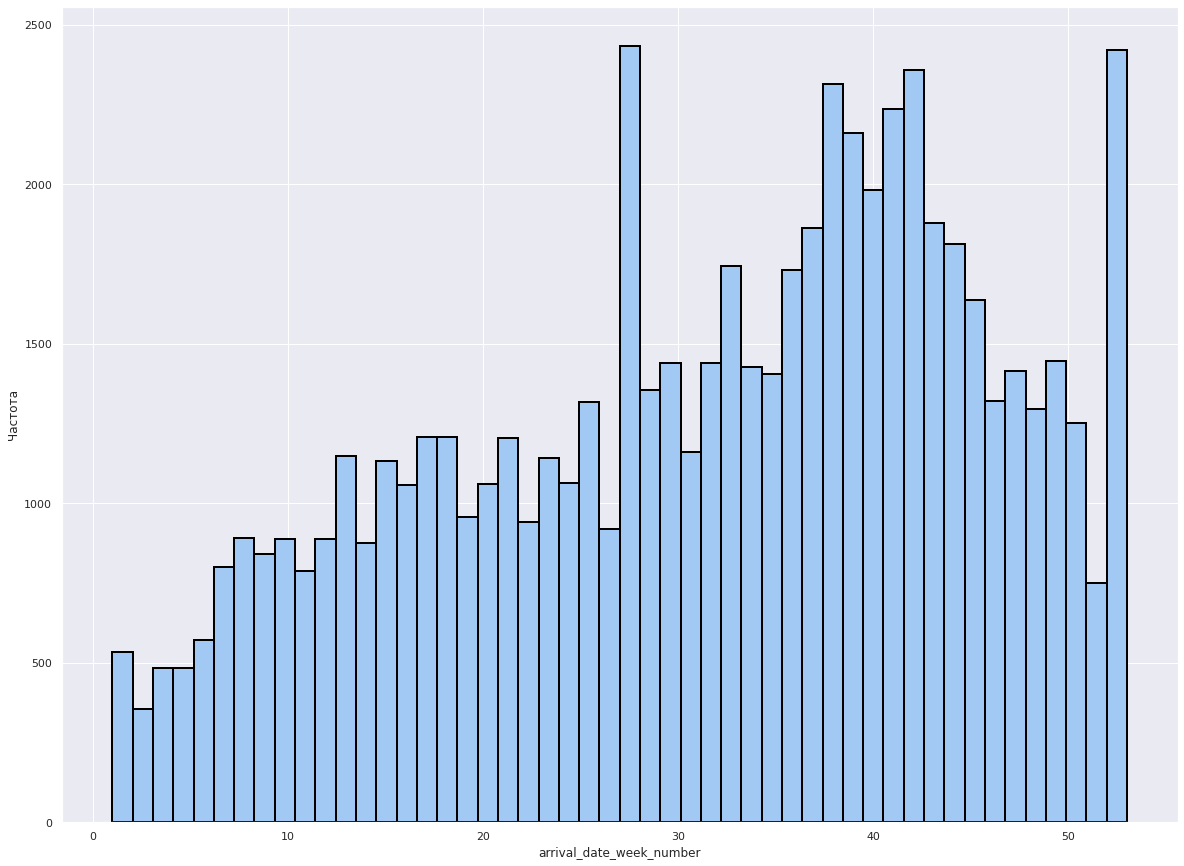

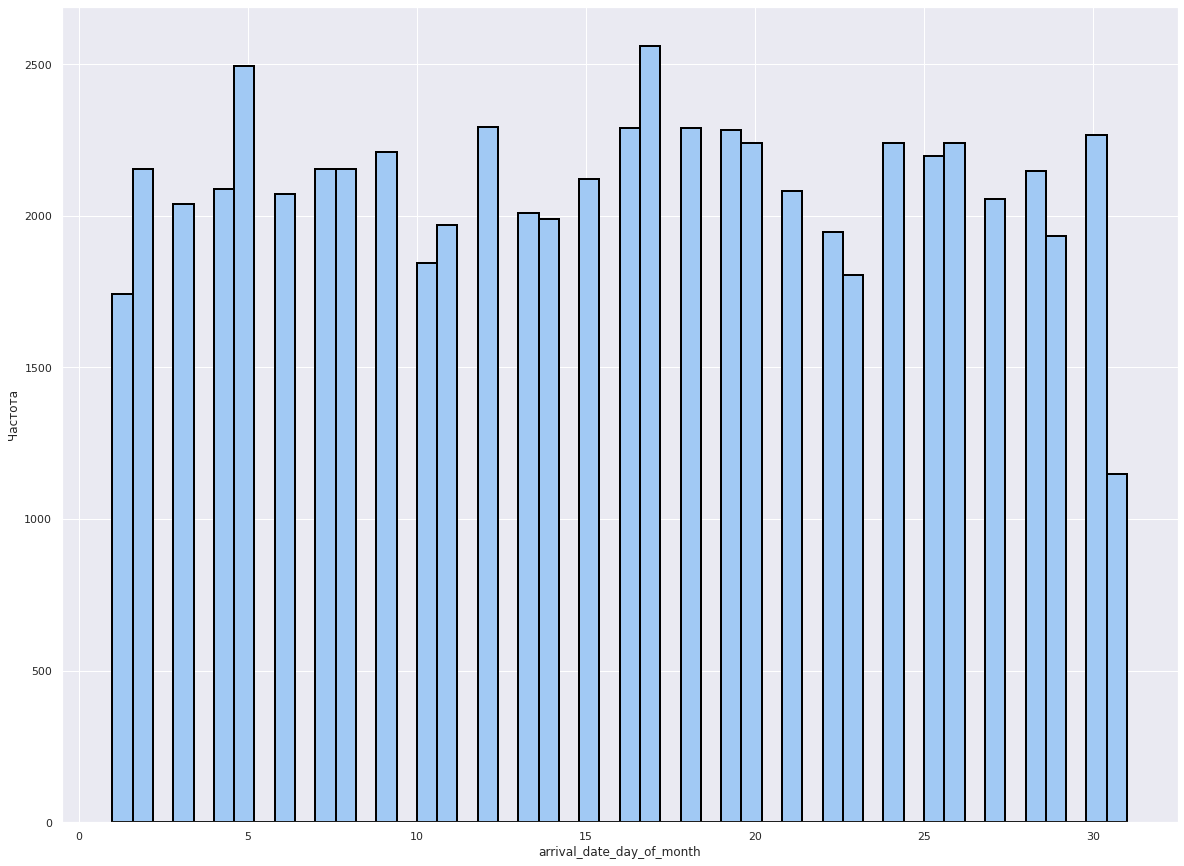

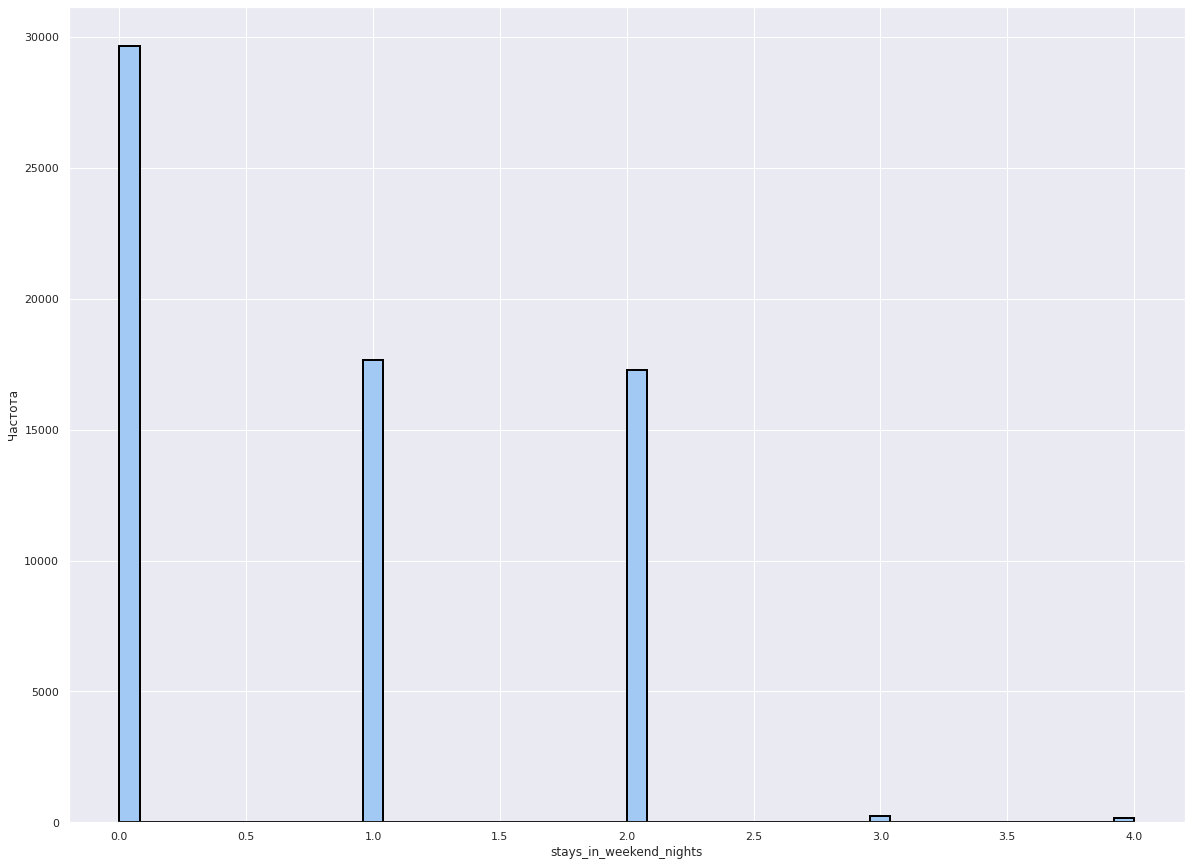

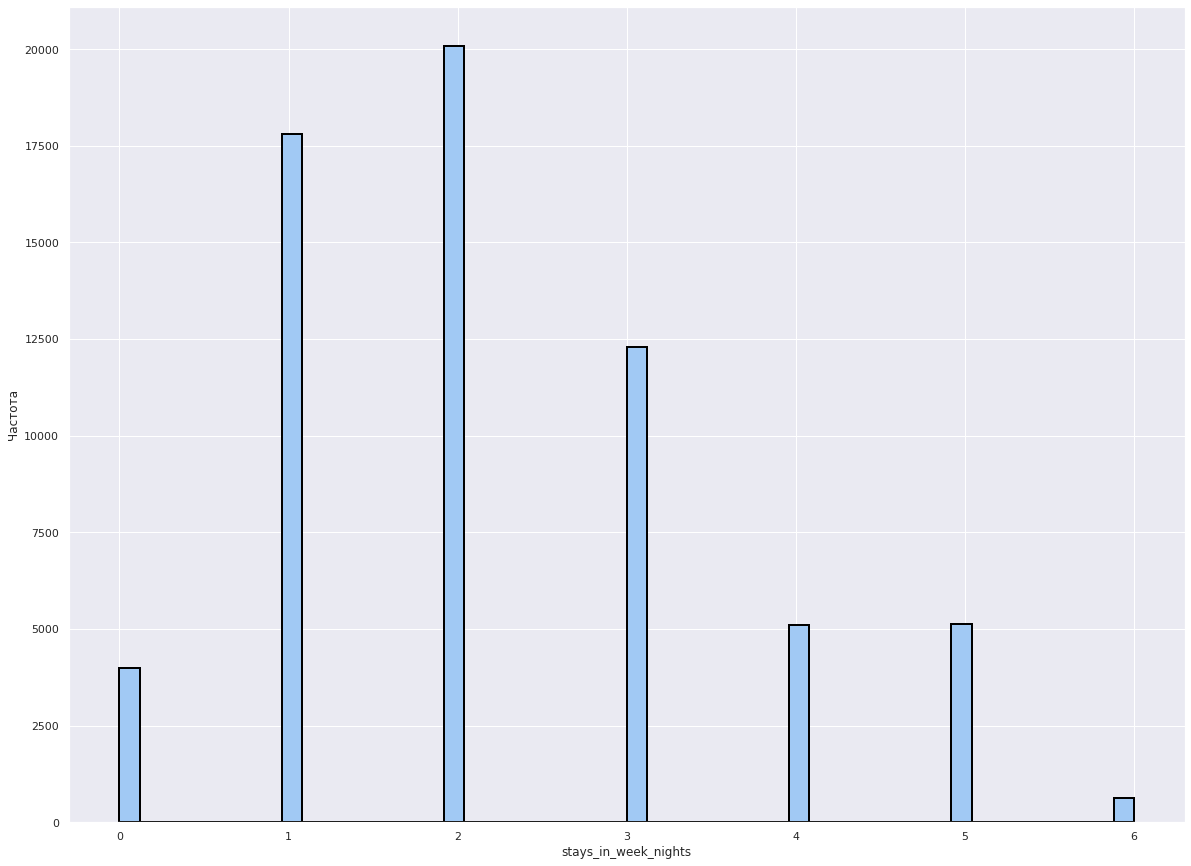

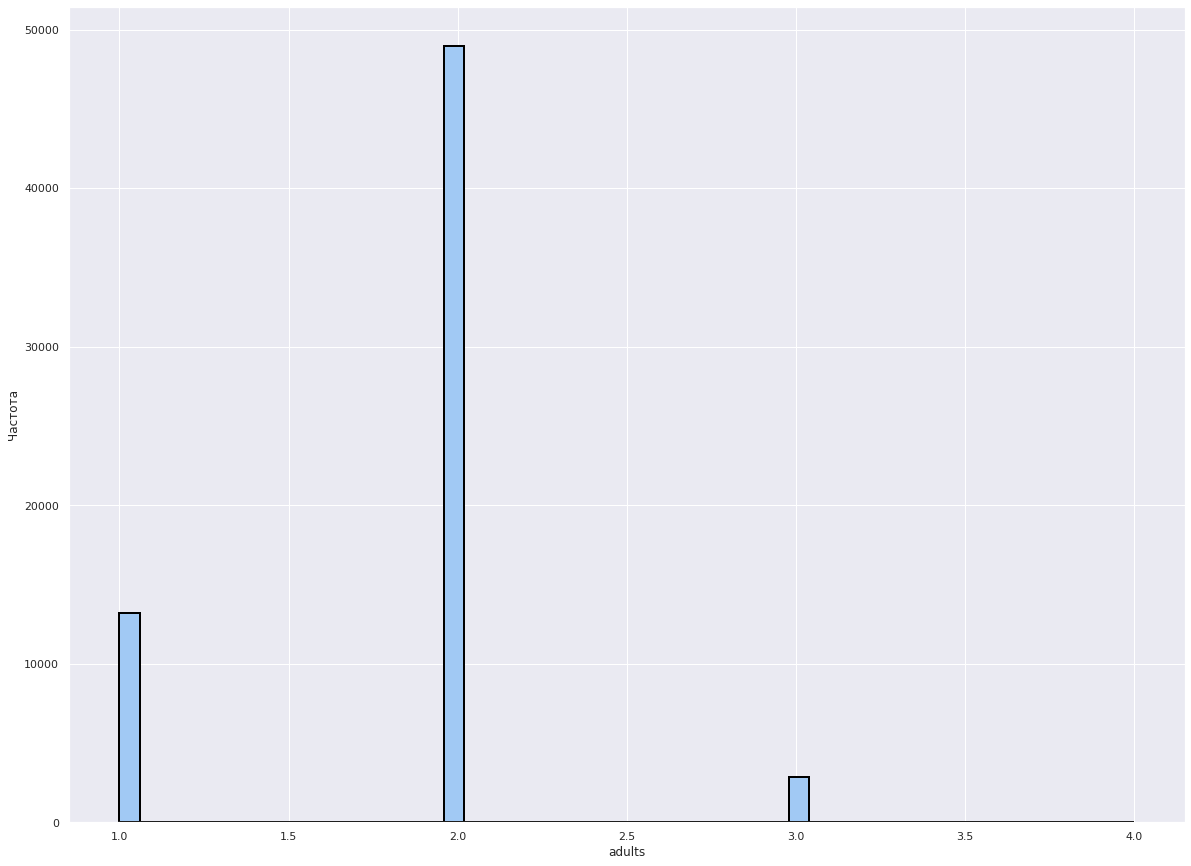

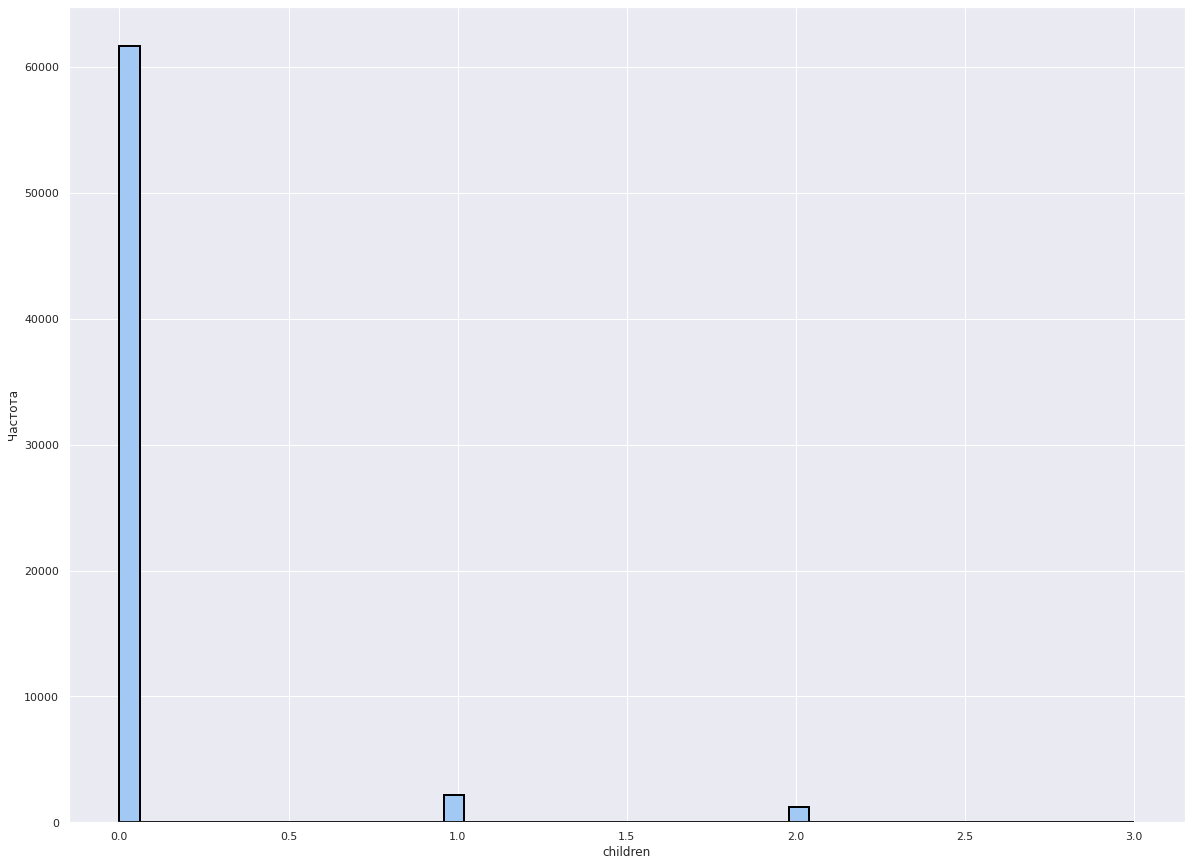

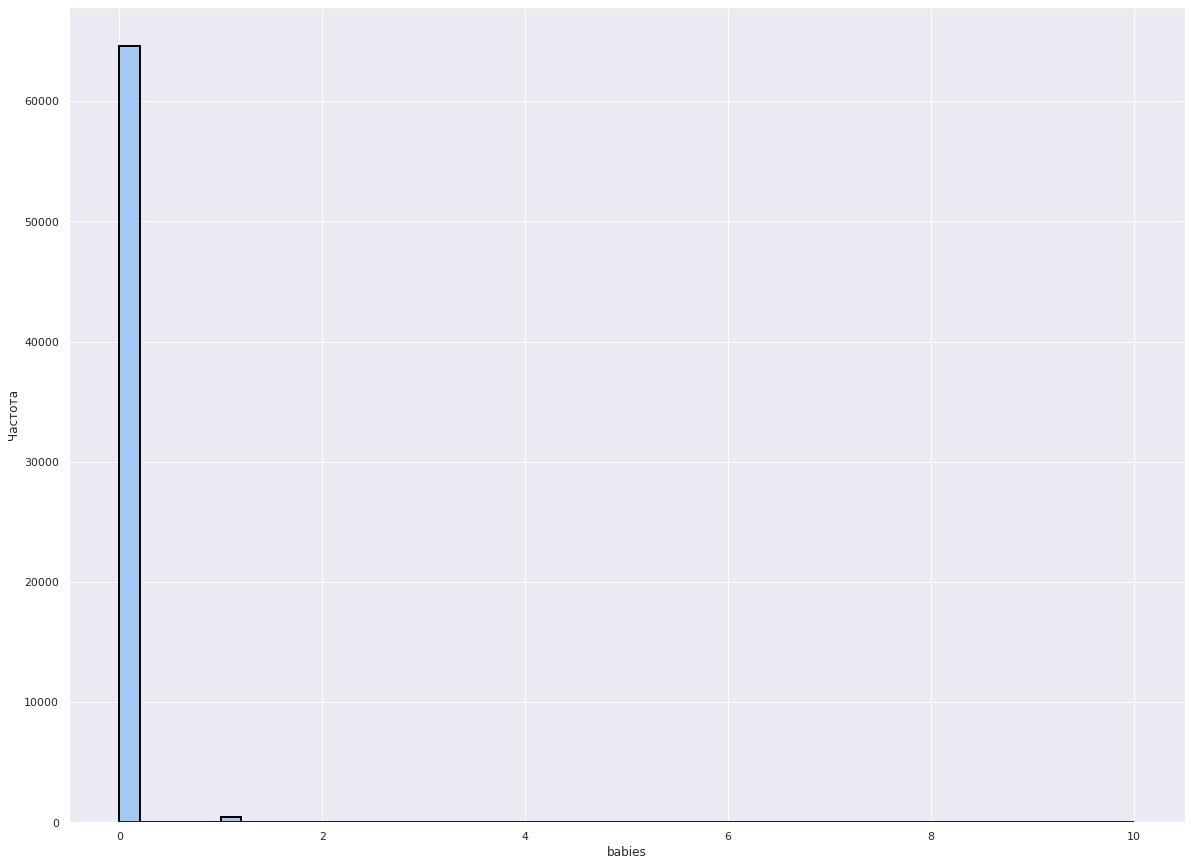

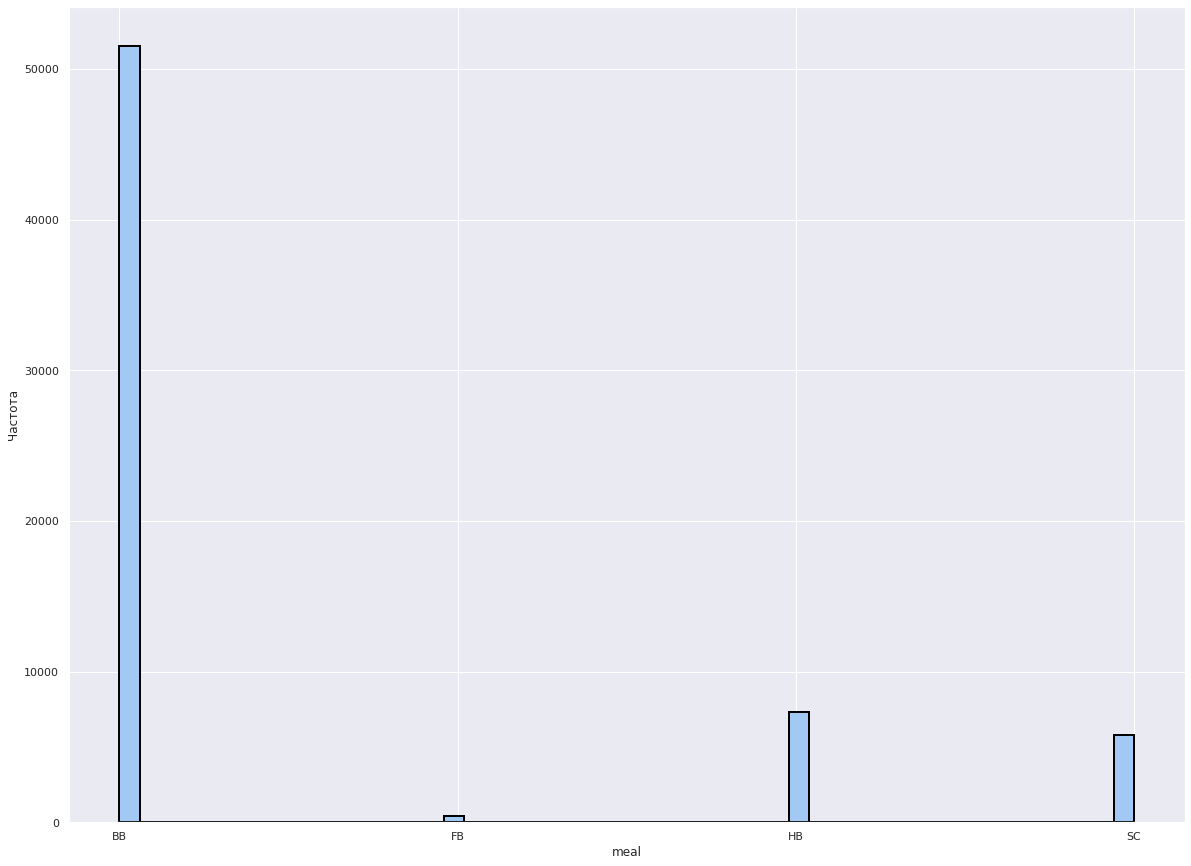

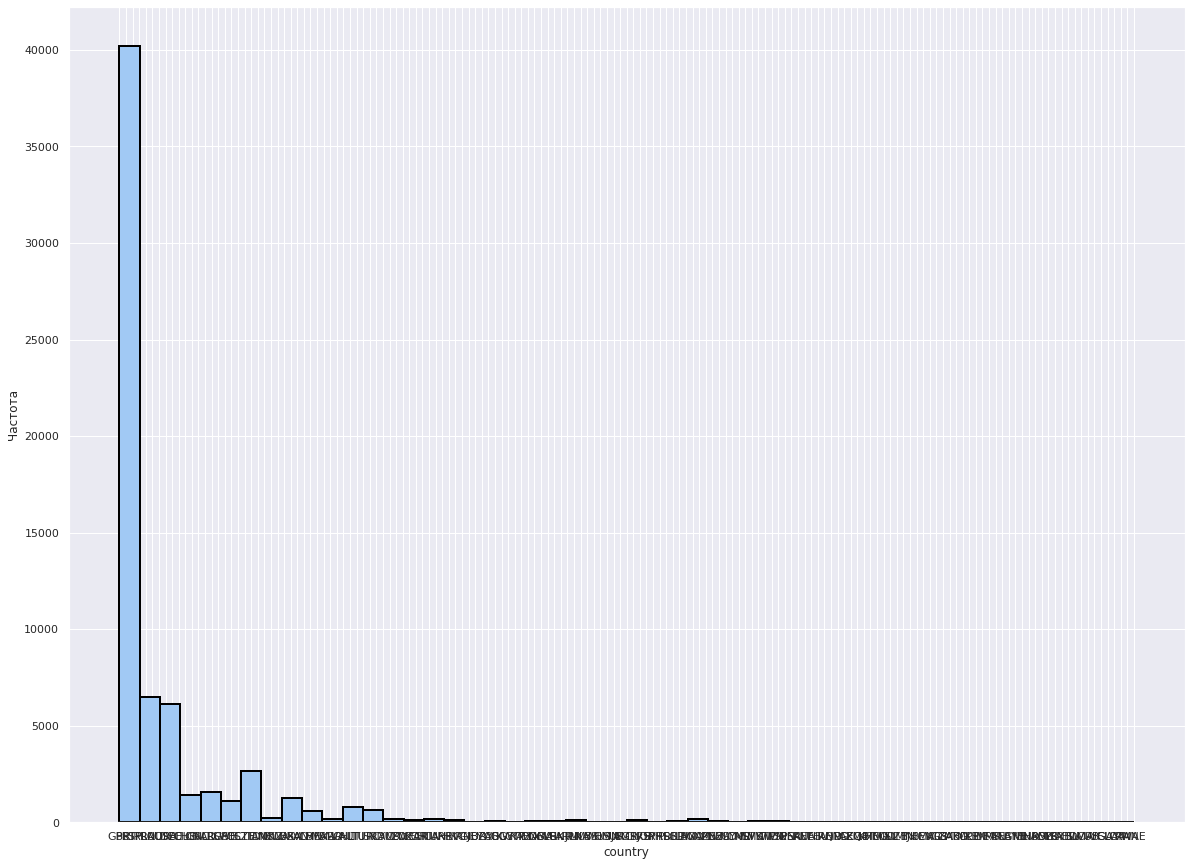

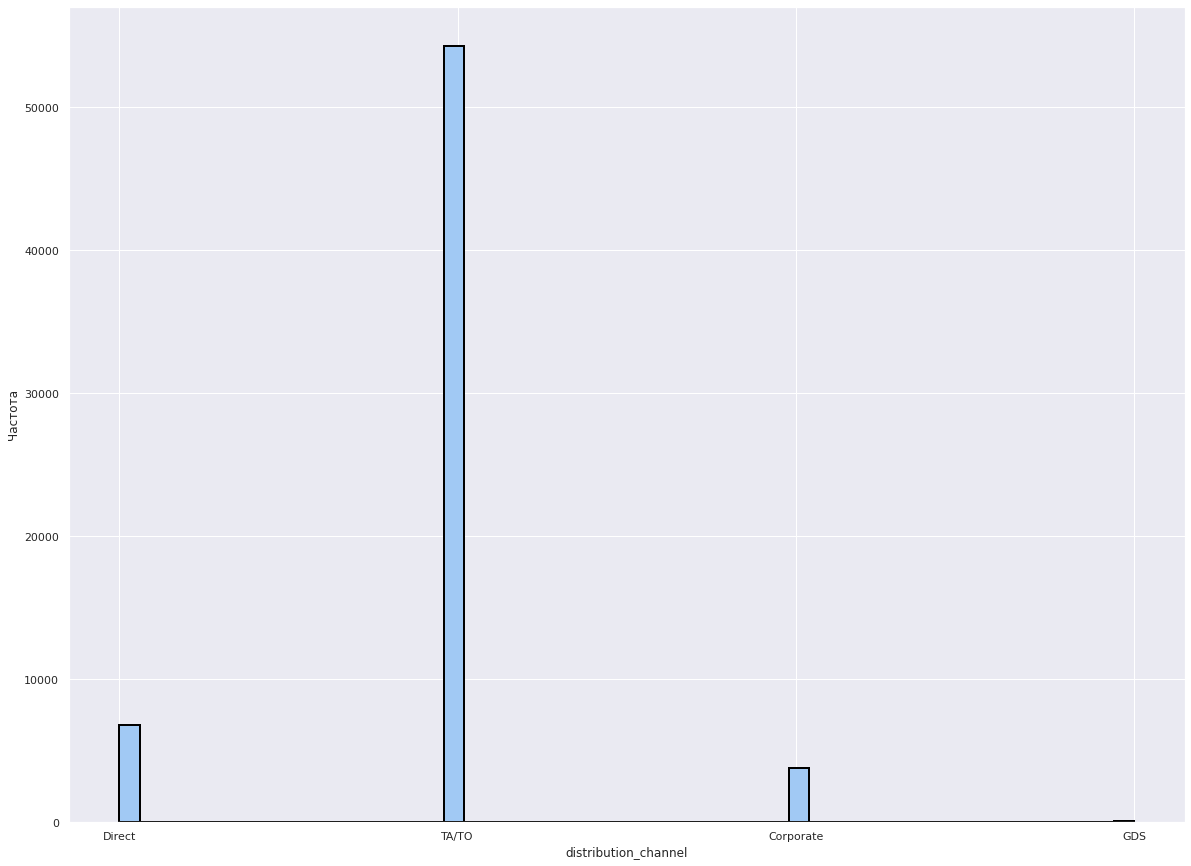

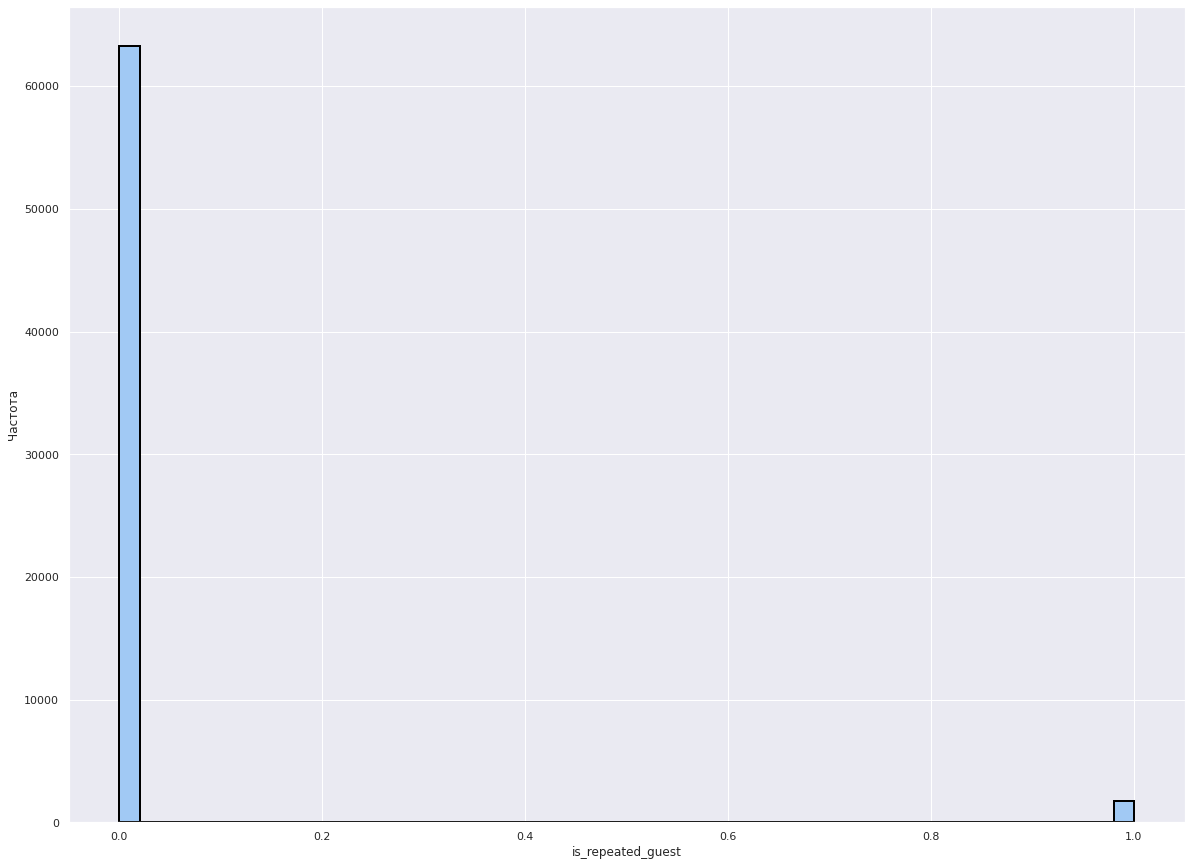

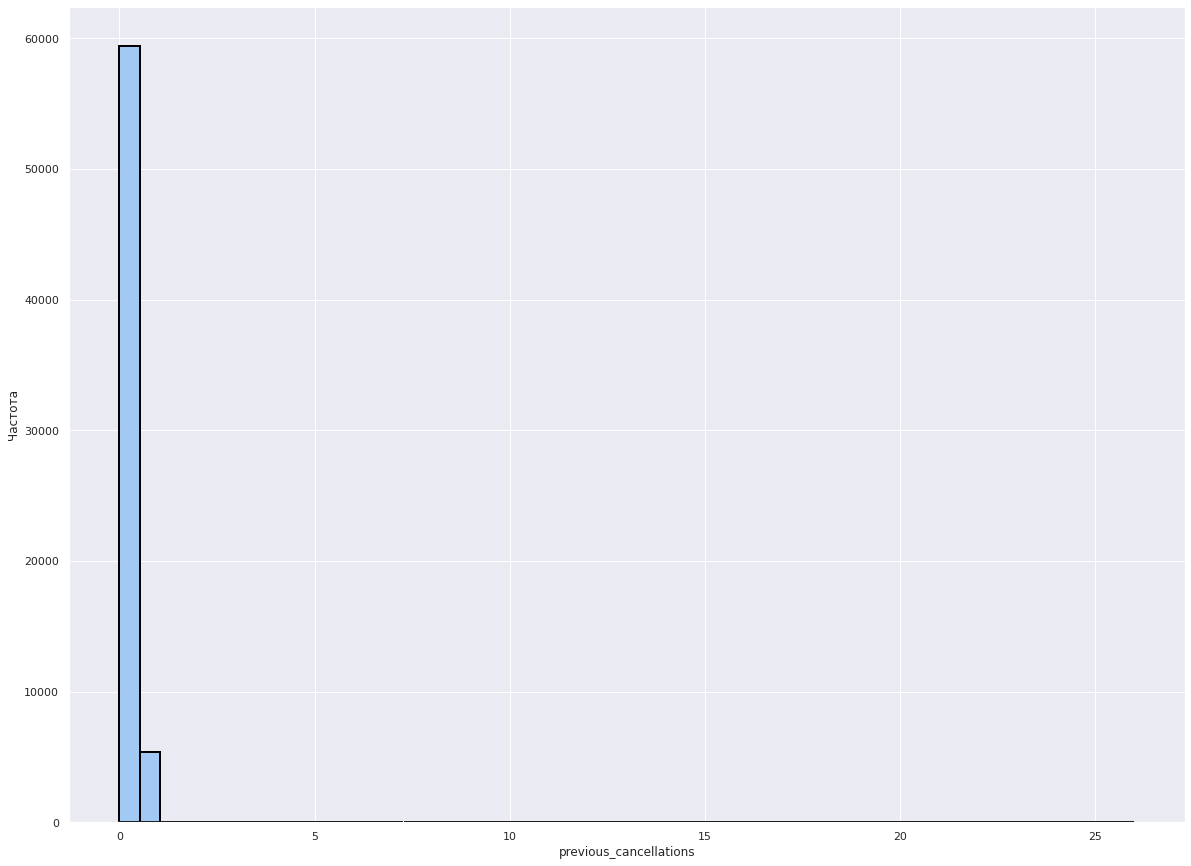

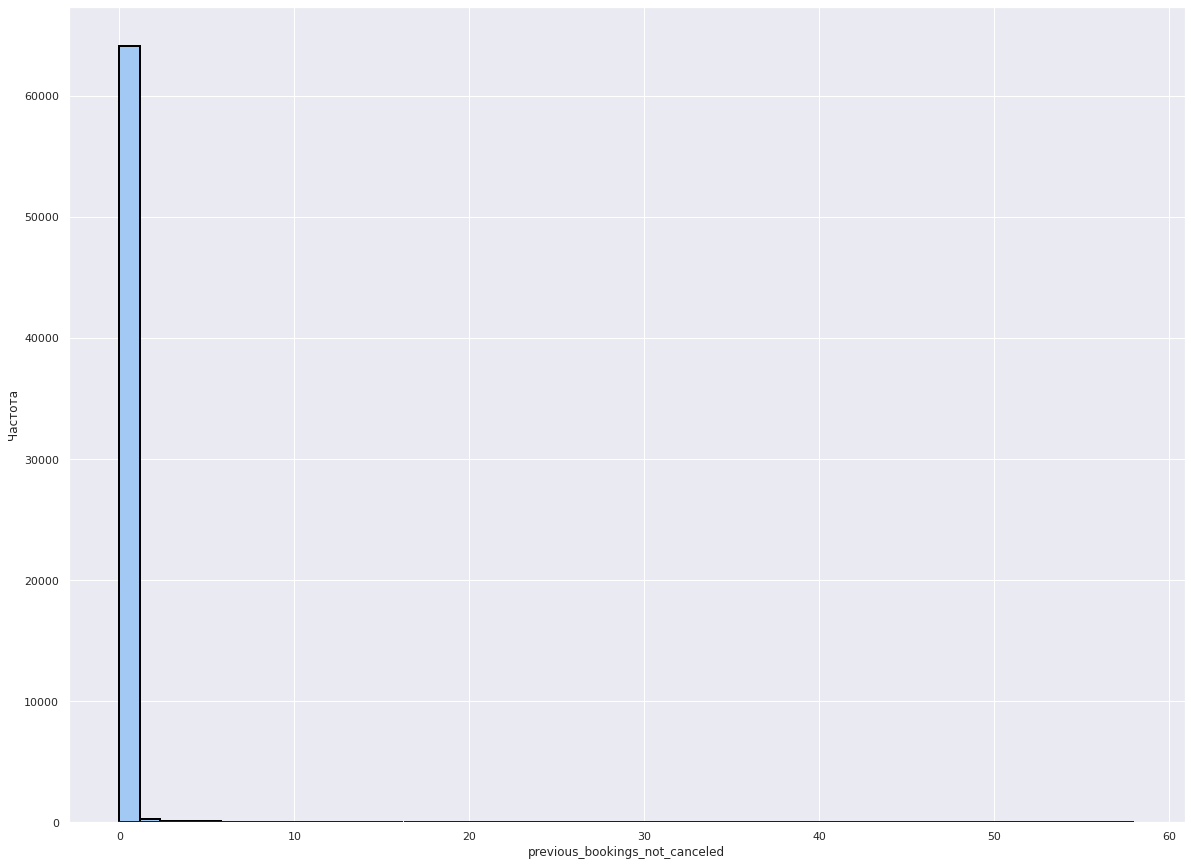

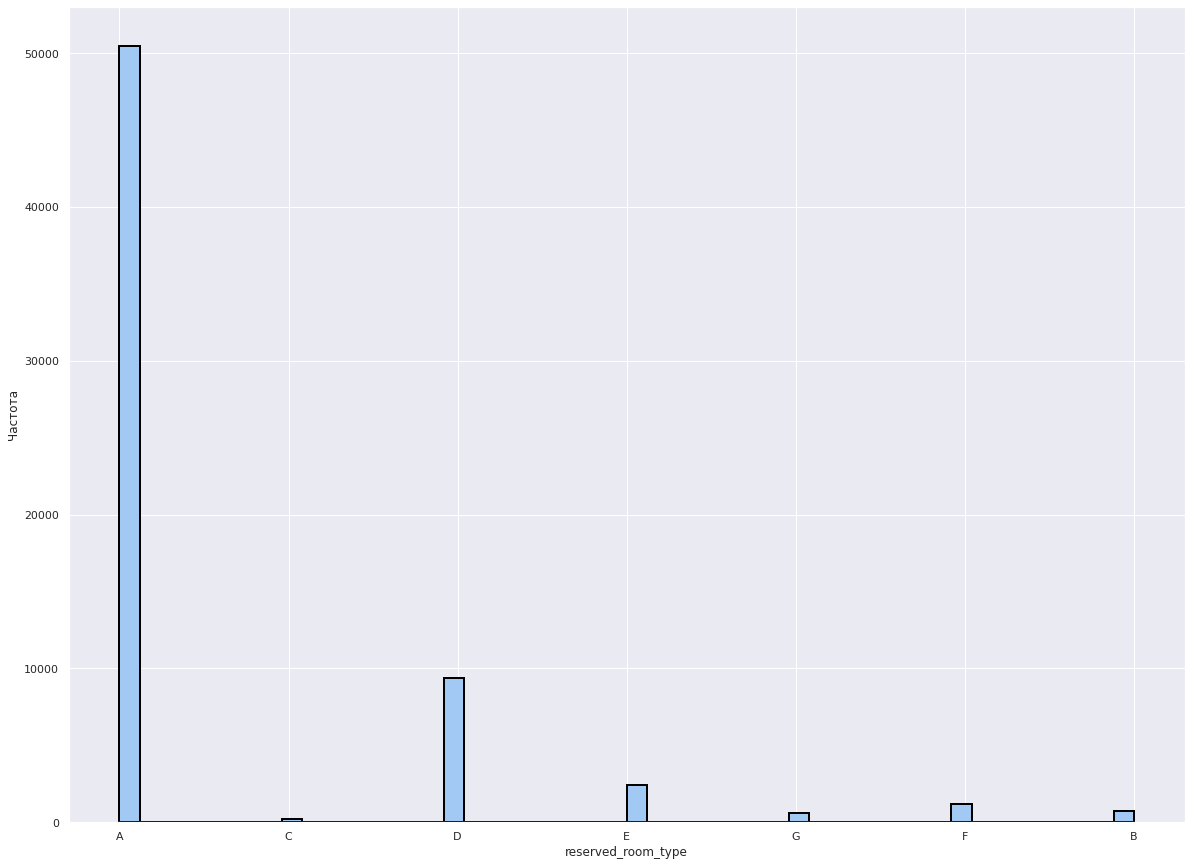

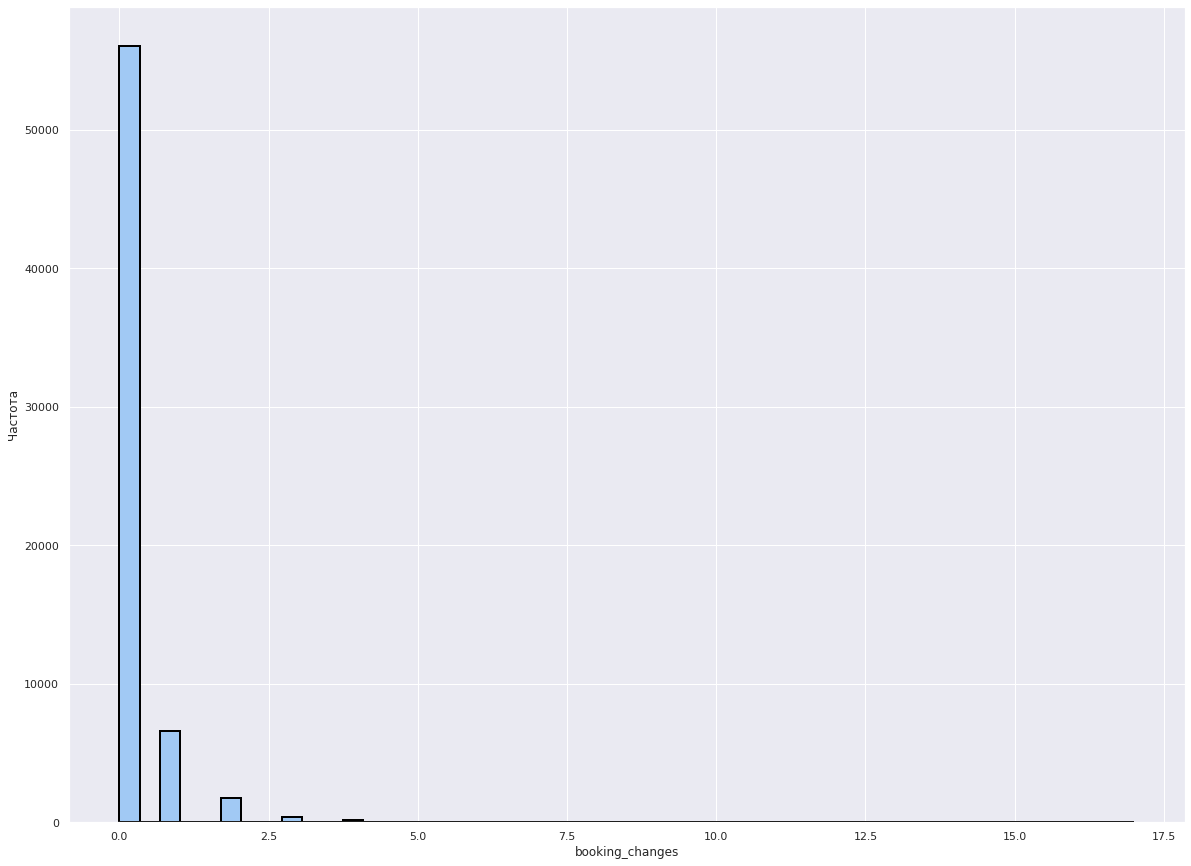

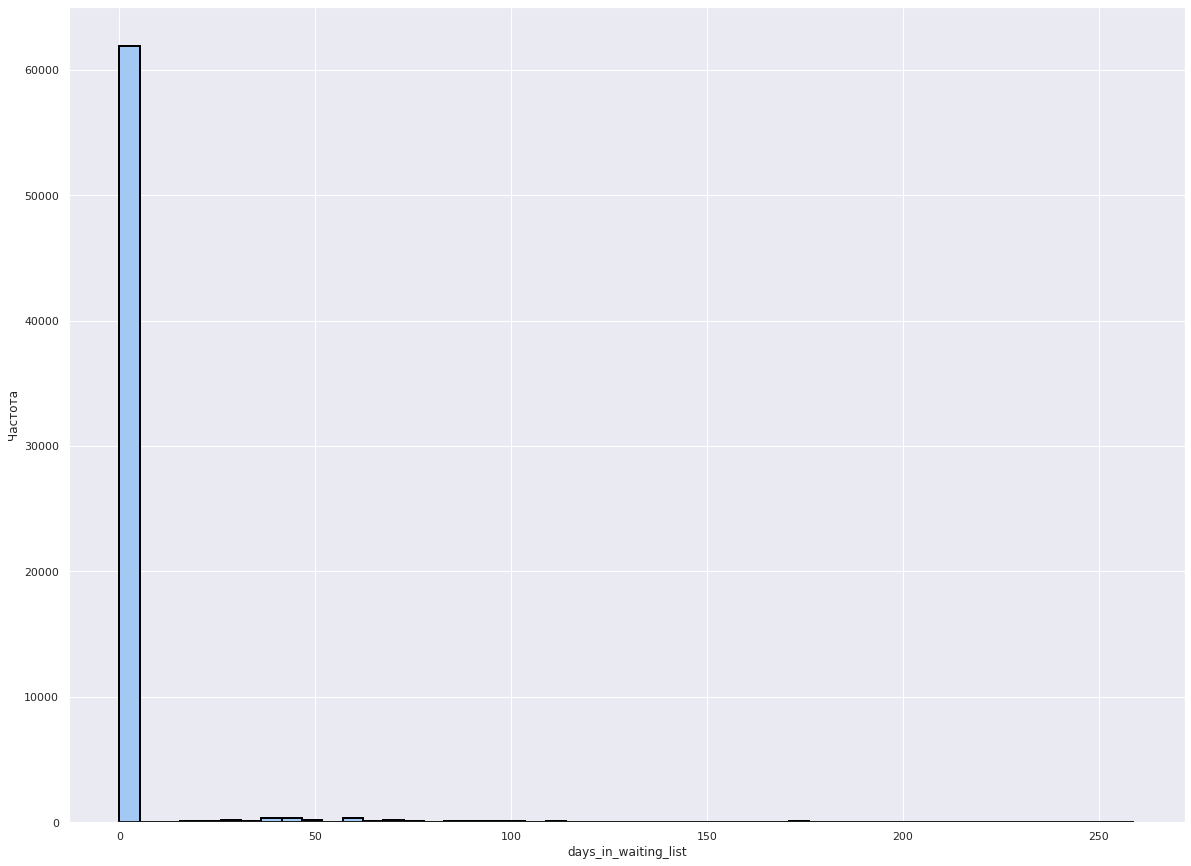

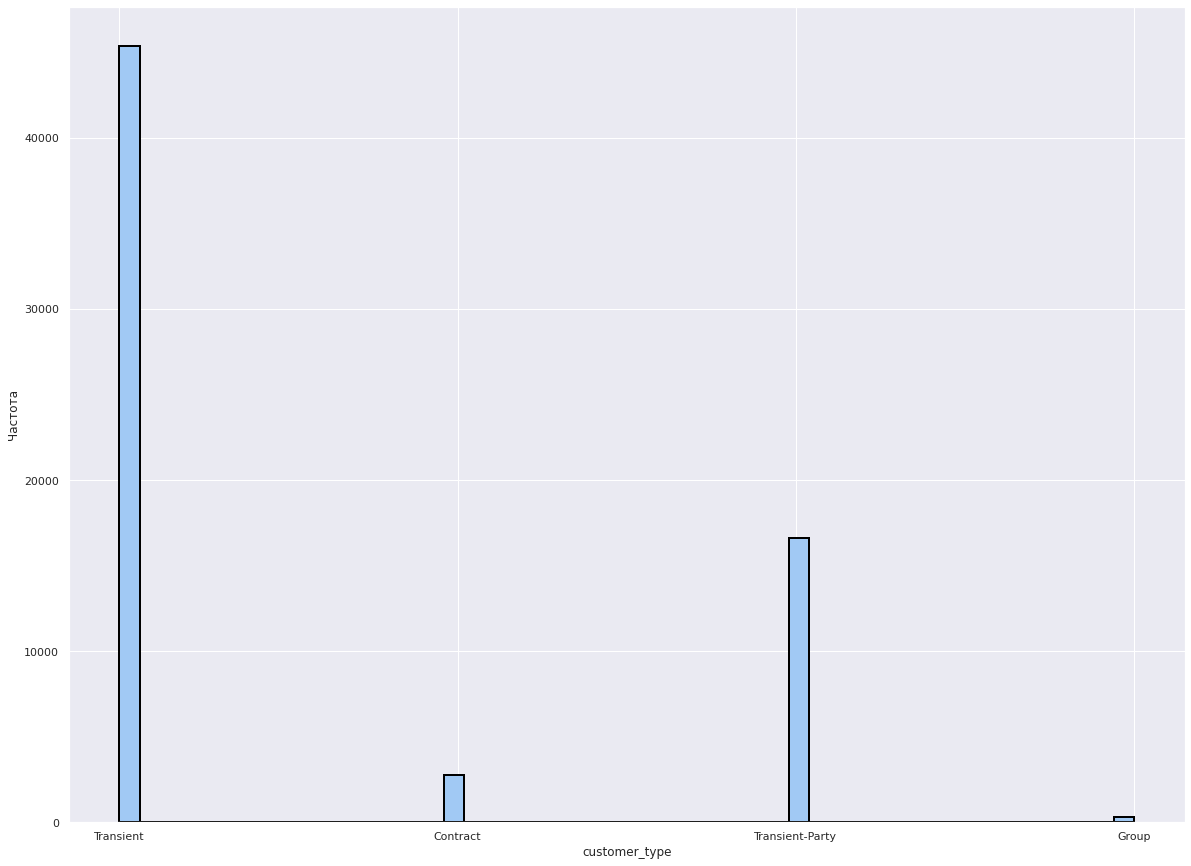

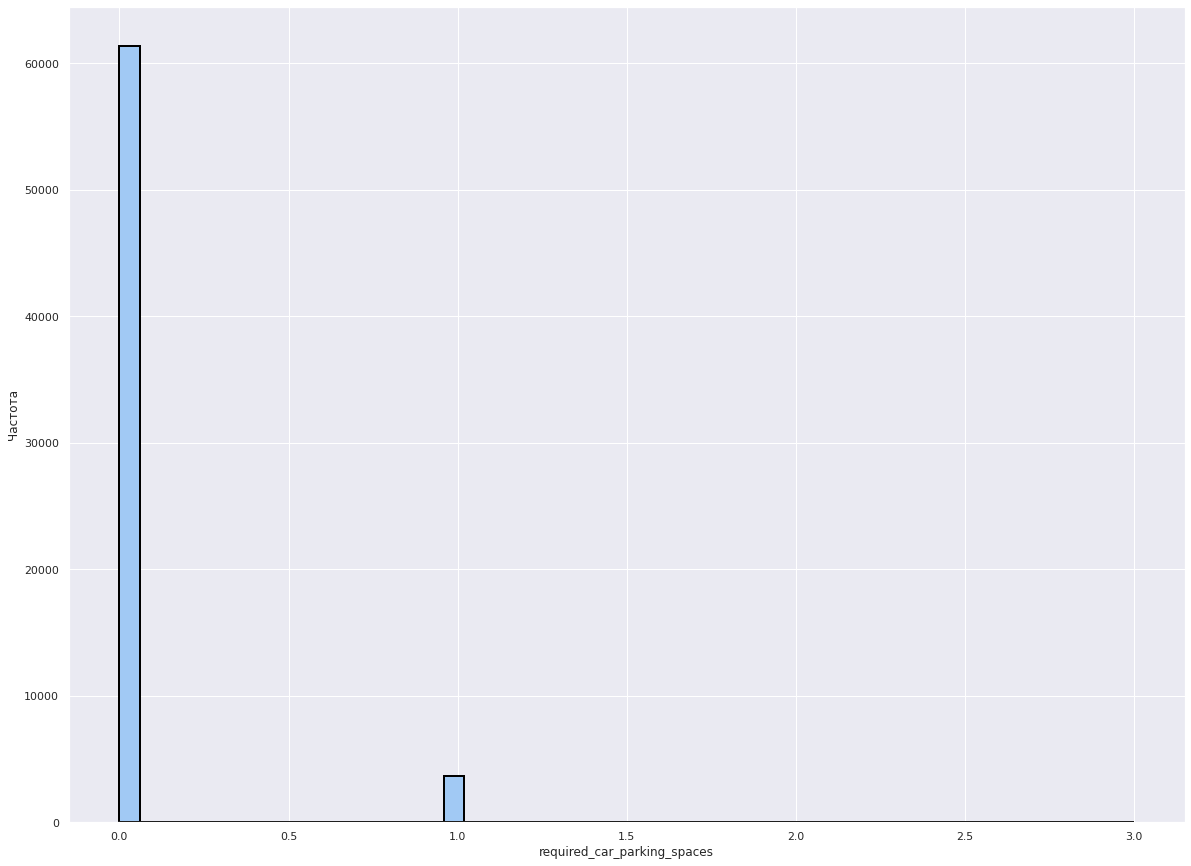

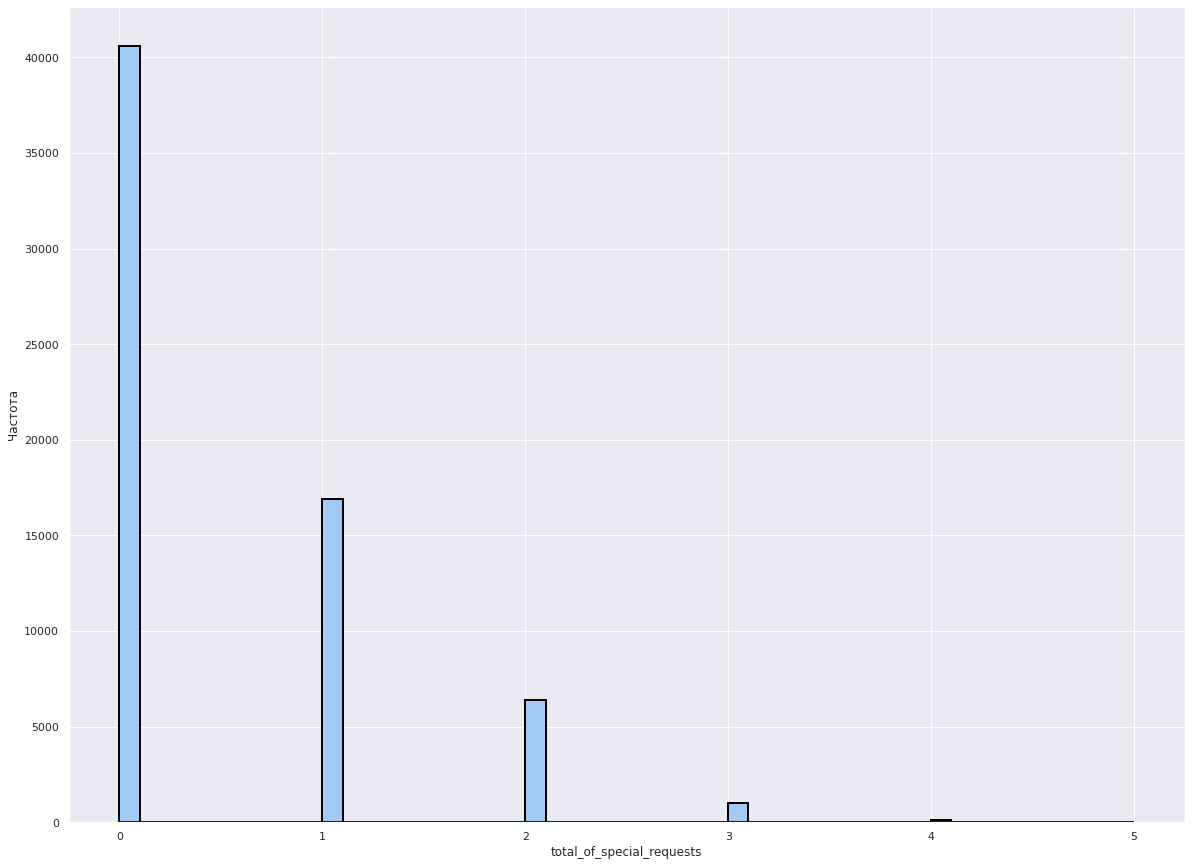

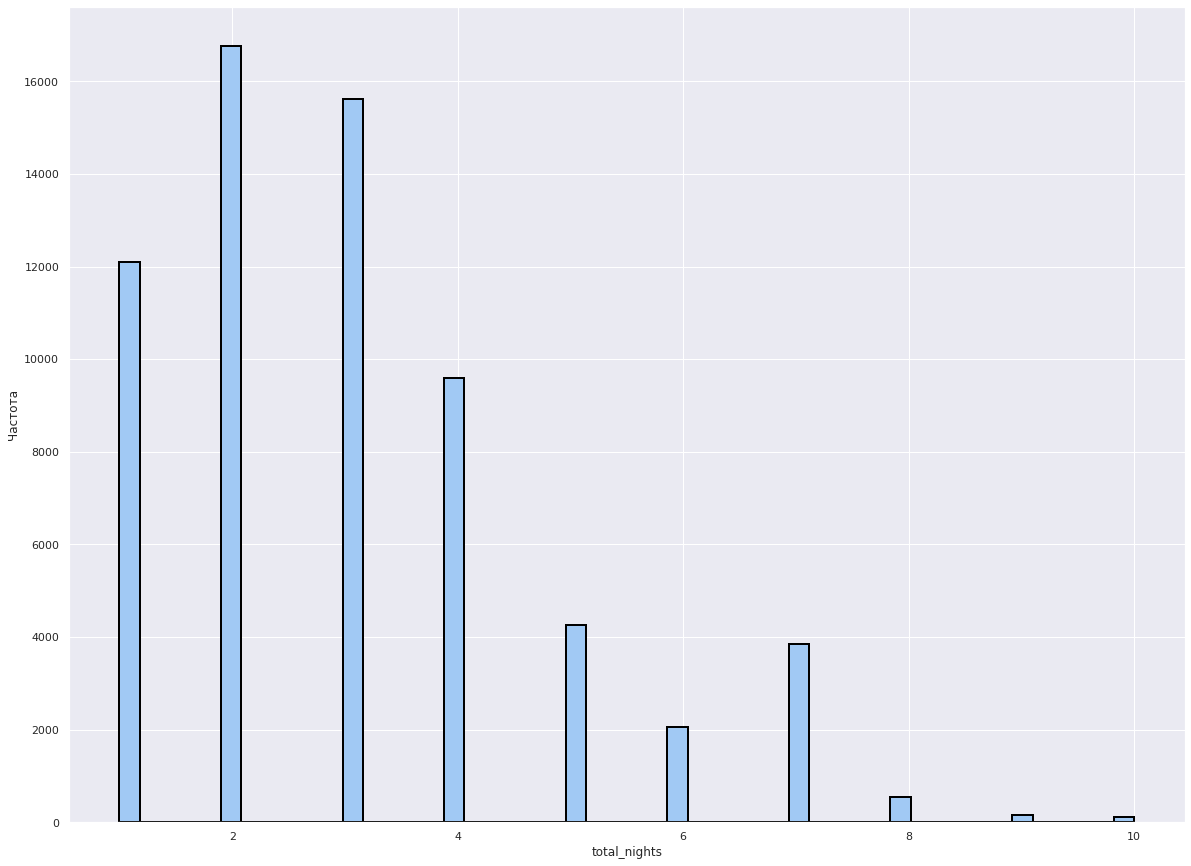

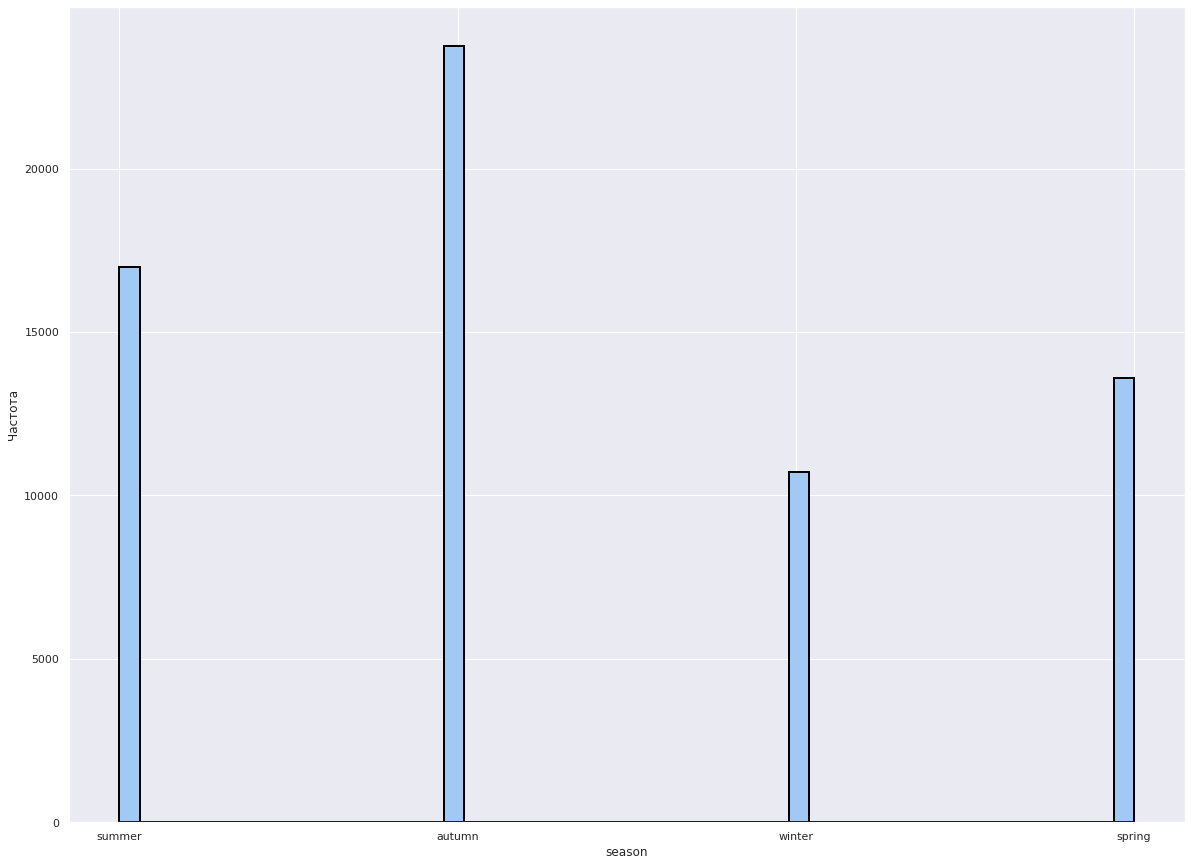

In [39]:
columns = df_train.columns
for column in columns:
    df_train[column].hist(bins=50, figsize=(20, 15), edgecolor='black', linewidth=2)
    plt.xlabel(column) 
    plt.ylabel('Частота')
    plt.show()

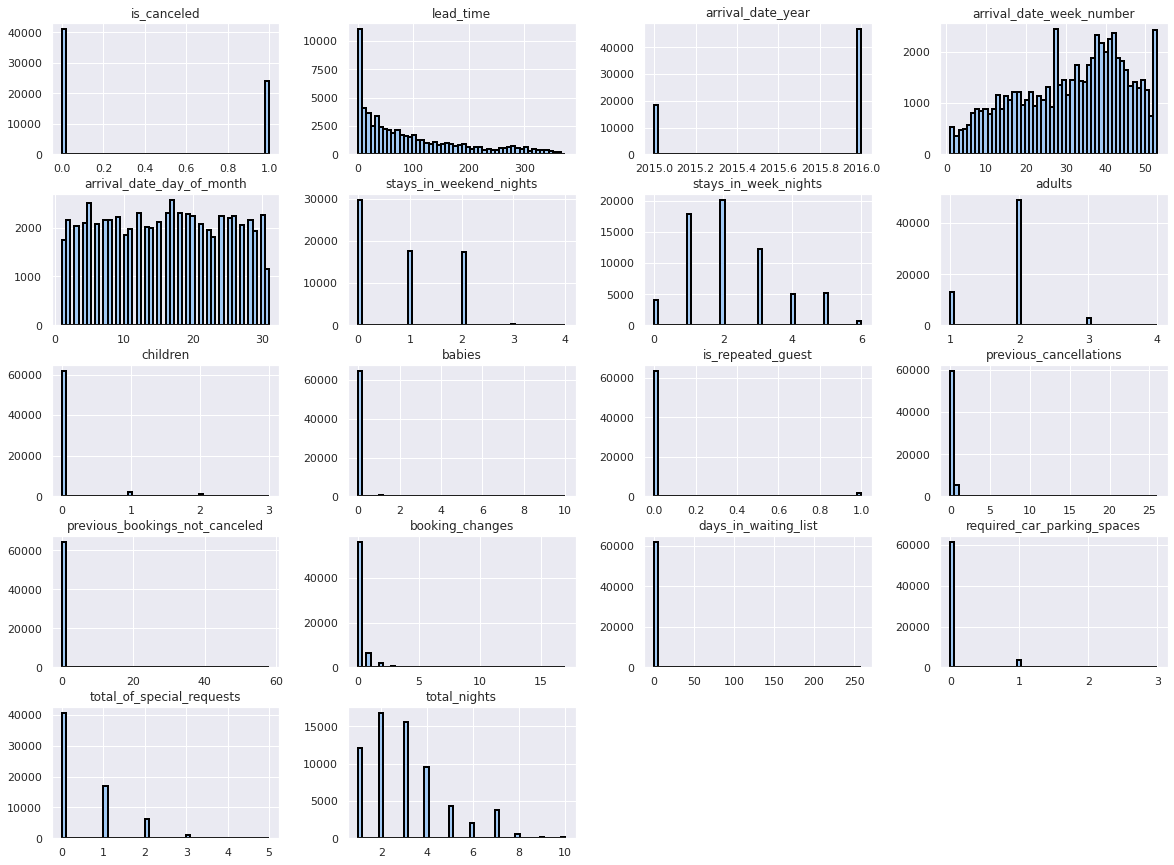

In [40]:
df_train.hist(bins=50, figsize=(20, 15), edgecolor='black', linewidth=2)
plt.show()

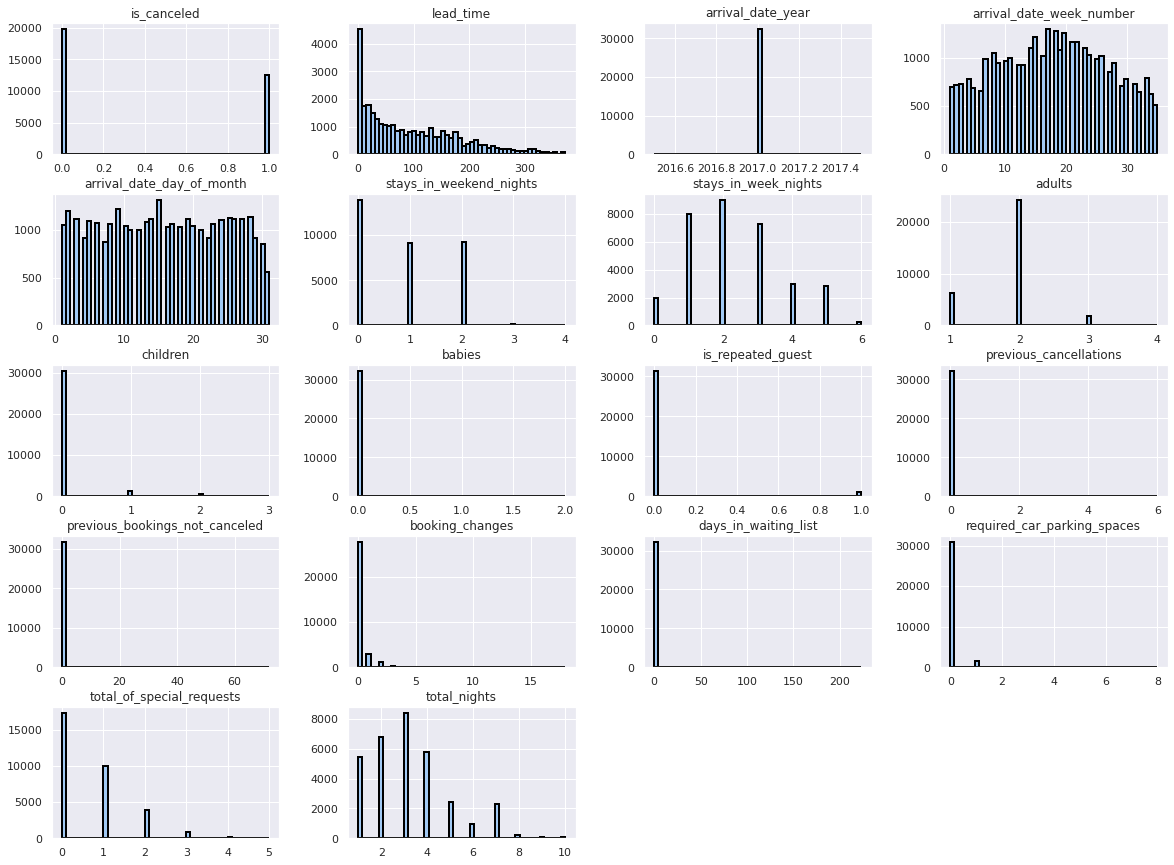

In [41]:
df_test.hist(bins=50, figsize=(20, 15), edgecolor='black', linewidth=2)
plt.show()

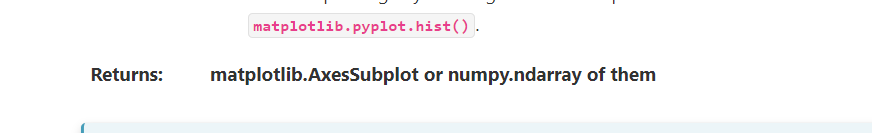

**Оценка количества отмененных броней по классу номеров датасета**

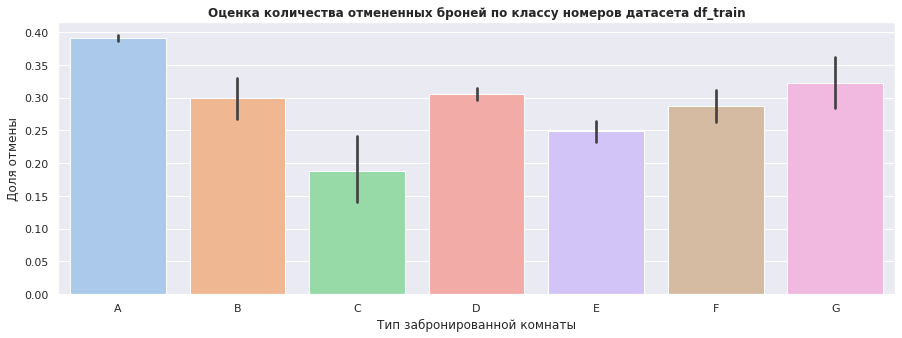

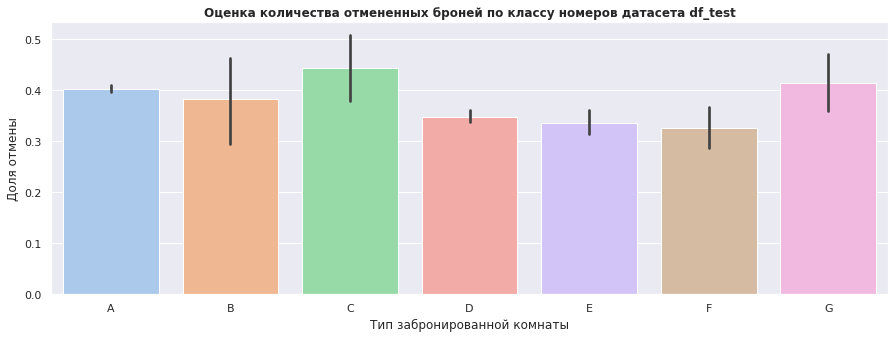

In [42]:
datas = [df_train, df_test]
AX = 0
for data in datas:
    sns.barplot(data=data, x='reserved_room_type', y='is_canceled', order = ['A','B','C','D','E','F','G'])
    plt.title(f'Оценка количества отмененных броней по классу номеров датасета {titles[AX]}', fontweight="bold")
    plt.xlabel('Тип забронированной комнаты')
    plt.ylabel('Доля отмены')
    AX += 1
    plt.show()

**ВЫВОД**
* Мы загрузили данные и просмотрели основные сведения. Данные хорошо подготовлены, нет пропусков.  
* Удалили неинформативный столбец id, удалили лишние пробелы. 
* Отменяется 37-39 % брони.  
* Класс номеров A (особенно), В, С и G традиционно находится в топе по отмене броней, тогда как E и F подвержены отмене меньше всего.  
* Количество дней между датой бронирования и датой прибытия (lead_time) наиболее тесно связано с тем, отменено бронирование или нет. Имеет смысл, что по мере увеличения количества дней между моментом оформления бронирования и предполагаемой датой прибытия у клиентов появляется больше времени для отмены бронирования и больше времени для возникновения непредвиденных обстоятельств, срывающих планы поездок.  
* Количество отменённых заказов у клиента (previous_cancellations) также положительно коррелирует с отменой брони, что может свидетельствовать о ненадежности клиента, в тестовом датасете, такой корреляции нет, возможно это свидетельствует о неполноте данных в этом датасете.  
* Количество специальных отметок (total_of_special_requests) является вторым признаком, которая отрицательно коррелирует с нашей целью отмены. По мере увеличения количества специальных отметок вероятность отмены бронирования уменьшается. Это говорит о том, что взаимодействие с отелем до прибытия и ощущение, что их потребности услышаны, может снизить вероятность отмены бронирования клиентом.  
* Что касается количество необходимых парковочных мест (requires_car_parking_spaces) является третьим признаком, которая наиболее сильно коррелирует с нашей целью отмены. По мере увеличения количества запросов на парковочные места вероятность отмены бронирования уменьшается.  
* Количество изменений параметров заказа (booking_changes), также отрицательно коррелирует с отменой брони.

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

**Рассчитаем прибыльность за отчетный период на основе предоставленных условий**

In [43]:
BUDGET = 400_000
rooms = pd.DataFrame({'A':[1000, 400],       # для каждого типа комнаты присвоим цену за ночь и за уборку
                     'B':[800, 350],
                     'C':[600, 350],
                     'D':[550, 150],
                     'E':[500, 150],
                     'F':[450, 150],
                     'G':[350, 150]}, index = ['night_price', 'service'])
season_ratio = pd.DataFrame({'summer':[1.4],   #   для каждого сезона присвоим коэффициент
                           'autumn':[1.2],
                           'spring':[1.2],
                            'winter':[1]}, index = ['ratio'])

In [44]:
def revenue(data):      # функция для подсчтеа прибыли
    room_type = data['reserved_room_type']
    season = data['season']
    total_nights = data['stays_in_week_nights'] + data['stays_in_weekend_nights']
    is_canceled = data['is_canceled']
    
    room_price = rooms[room_type].night_price
    service_price = rooms[room_type].service
    ratio_for_price = season_ratio[season].ratio
   
    
    if is_canceled:
        profit = -ratio_for_price * ( room_price) - service_price
    else:
        profit = ratio_for_price * (total_nights*room_price) - ((1 + total_nights) // 2) * service_price 
    
    
    return profit

total_revenue = df_test.apply(revenue, axis = 1).sum() - BUDGET

In [45]:
print('Прибыль отеля без внедрения депозитов равна ', total_revenue / 1000000, 'млн.руб.')

Прибыль отеля без внедрения депозитов равна  34.82194 млн.руб.


In [46]:
print('Значит прибыль с внедренияим депозитов должна быть >=', total_revenue / 1000000 + BUDGET / 1000000)

Значит прибыль с внедренияим депозитов должна быть >= 35.22194


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Сделано.
</div>

**Подготавливаем данные для ML**

In [47]:
df_train = df_train.drop('season', axis = 1) # удалим сезоны, так как у нас уже есть месяца
seasons = df_test['season']
df_test = df_test.drop('season', axis = 1)

**Разделяем на признаки**

In [48]:
features_train = df_train.drop('is_canceled', axis = 1)
target_train = df_train['is_canceled']


features_test = df_test.drop('is_canceled', axis = 1)
target_test = df_test['is_canceled']

**Кодируем данные методом OneHotEncoder**

In [49]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder_ohe.fit(features_train[features_train.select_dtypes(include='object').columns])
def enc(features_train):
    features_train[
        encoder_ohe.get_feature_names_out()
    ] = encoder_ohe.transform(features_train[features_train.select_dtypes(include='object').columns])
    features_train = features_train.drop(features_train[features_train.select_dtypes(include='object').columns], axis=1)
    return features_train

features_train = enc(features_train)
features_test = enc(features_test)

**Масштабируем**

In [50]:
numeric = [*features_train.select_dtypes(exclude=['object']).columns]
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [51]:
features_train.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ATA,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NIC,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.93,-1.60,-0.32,-1.70,-0.97,-0.90,-1.78,-0.22,-0.07,-0.17,-0.13,-0.08,-0.33,-0.18,-0.24,-0.68,-1.18,-0.34,-0.30,-0.23,-0.17,3.23,-0.28,-0.26,-0.28,-0.31,-0.41,-0.39,-0.08,-0.36,-0.31,-0.05,-0.01,-0.00,-0.02,-0.04,-0.01,-0.00,-0.05,-0.11,-0.01,-0.00,-0.14,-0.00,-0.00,-0.01,-0.03,-0.00,-0.01,-0.01,-0.01,-0.13,-0.01,-0.00,-0.12,-0.03,-0.09,-0.01,-0.01,-0.09,-0.02,-0.02,-0.01,-0.00,-0.00,-0.02,-0.04,-0.25,-0.00,-0.06,-0.01,-0.03,-0.01,-0.02,-0.28,-0.03,-0.00,-0.06,-0.32,-0.01,3.43,-0.01,-0.01,-0.01,-0.01,-0.01,-0.04,-0.00,-0.02,-0.00,-0.03,-0.04,-0.02,-0.00,-0.04,-0.15,-0.03,-0.01,-0.02,-0.08,-0.19,-0.01,-0.01,-0.01,-0.04,-0.01,-0.01,-0.01,-0.00,-0.03,-0.01,-0.02,-0.01,-0.00,-0.01,-0.01,-0.03,-0.05,-0.02,-0.01,-0.04,-0.01,-0.01,-0.03,-0.01,-0.00,-0.01,-0.00,-0.01,-0.02,-0.01,-0.01,-0.02,-0.00,-0.02,-0.00,-0.13,-0.06,-0.03,-0.01,-0.01,-0.01,-0.02,-0.01,-0.00,-0.09,-0.01,-0.89,-0.00,-0.00,-0.01,-0.06,-0.07,-0.00,-0.02,-0.01,-0.02,-0.00,-0.00,-0.04,-0.00,-0.01,-0.03,-0.03,-0.09,-0.00,-0.00,-0.03,-0.01,-0.01,-0.02,-0.05,-0.02,-0.01,-0.00,-0.03,-0.01,-0.13,-0.00,-0.02,-0.00,-0.01,-0.02,-0.00,-0.00,2.92,-0.04,-2.25,-0.11,-0.06,-0.41,-0.20,-0.14,-0.10,-0.07,0.66,-0.59
1,-0.86,-1.60,-0.32,-1.70,-0.97,-0.17,0.34,-0.22,-0.07,-

In [52]:
features_test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ATA,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NIC,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.23,2.85,-2.25,-1.70,0.21,-1.64,0.34,-0.22,-0.07,-0.17,-0.13,-0.08,-0.33,-0.18,-0.24,-0.68,-1.18,-0.34,-0.30,-0.23,5.79,-0.31,-0.28,-0.26,-0.28,-0.31,-0.41,-0.39,-0.08,-0.36,-0.31,-0.05,-0.01,-0.00,-0.02,-0.04,-0.01,-0.00,-0.05,-0.11,-0.01,-0.00,-0.14,-0.00,-0.00,-0.01,-0.03,-0.00,-0.01,-0.01,-0.01,-0.13,-0.01,-0.00,-0.12,-0.03,-0.09,-0.01,-0.01,-0.09,-0.02,-0.02,-0.01,-0.00,-0.00,-0.02,-0.04,-0.25,-0.00,-0.06,-0.01,-0.03,-0.01,-0.02,-0.28,-0.03,-0.00,-0.06,-0.32,-0.01,-0.29,-0.01,-0.01,-0.01,-0.01,-0.01,-0.04,-0.00,-0.02,-0.00,-0.03,-0.04,-0.02,-0.00,-0.04,-0.15,-0.03,-0.01,-0.02,-0.08,-0.19,-0.01,-0.01,-0.01,-0.04,-0.01,-0.01,-0.01,-0.00,-0.03,-0.01,-0.02,-0.01,-0.00,-0.01,-0.01,-0.03,-0.05,-0.02,-0.01,-0.04,-0.01,-0.01,-0.03,-0.01,-0.00,-0.01,-0.00,-0.01,-0.02,-0.01,-0.01,-0.02,-0.00,-0.02,-0.00,-0.13,-0.06,-0.03,-0.01,-0.01,-0.01,-0.02,-0.01,-0.00,-0.09,-0.01,1.12,-0.00,-0.00,-0.01,-0.06,-0.07,-0.00,-0.02,-0.01,-0.02,-0.00,-0.00,-0.04,-0.00,-0.01,-0.03,-0.03,-0.09,-0.00,-0.00,-0.03,-0.01,-0.01,-0.02,-0.05,-0.02,-0.01,-0.00,-0.03,-0.01,-0.13,-0.00,-0.02,-0.00,-0.01,-0.02,-0.00,-0.00,-0.34,-0.04,0.44,-0.11,-0.06,-0.41,-0.20,-0.14,-0.10,-0.07,0.66,-0.59
1,-0.36,2.85,-2.25,-1.70,1.38,-0.17,0.34,-0.22,-0.07,-0.17,

### Шаг 4. Разработка модели ML

**Выбор лучшей модели  
Далее нужно выбрать из них самую качественную, ту, которая удовлетворяла бы нашим условиям. Метрику выберем f1, для того, чтобы учитывать одновременно и точноть модели и полноту**

**Logistic Regression**

In [53]:
f = 0 
cw = ['balanced', None]
p = ['l1', 'l2']
for class_weight in cw:
    for penalty in p:
        for cc in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
            model = LogisticRegression(random_state = STATE, solver = 'saga', class_weight = class_weight,
                                      penalty = penalty, C = cc)
            scores = cross_val_score(model, features_train, target_train, cv = 5, scoring = 'f1')
            final_score = sum(scores) / len(scores)
            if final_score > f:
                f = final_score
                params_1 = model.get_params()
print('средняя оценка f1  модели:', f, '    при параметрах:')
print(params_1)

KeyboardInterrupt: 

**Decision Tree**

In [ ]:
f = 0
cw = ['balanced', None]
for weight in cw:
    for depth in range(1, 11):
        for split in range(2, 7):
            for leaf in range(1, 7):
                    model = DecisionTreeClassifier(random_state = STATE, max_depth = depth,
                                                  class_weight = weight, min_samples_split = split,
                                                  min_samples_leaf = leaf)
                    scores = cross_val_score(model,features_train, target_train, cv=5, scoring='f1')
                    final_score = sum(scores)/len(scores)
                    if final_score > f:
                        params_2 = model.get_params()
                        f = final_score                    
print('средняя оценка f1 качества модели:', f, 'при параметрах:')
print(params_2)

**Random Forest**

In [ ]:
f = 0
for depth in range(1, 11):
    for class_weight in cw:
        for estimators in (1, 500):
            model = RandomForestClassifier(
                random_state = STATE, class_weight = class_weight, n_estimators = estimators,
                max_depth = depth)
            scores = cross_val_score(model, features_train, target_train, cv = 5, scoring = 'f1')
            final_score = sum(scores) / len(scores)
            if final_score > f :
                f = final_score
                params_3 = model.get_params()
print('средняя оценка f1 качества модели:', f, '   достигается при параметрах:')
print(params_3)

**Лучшая модель, которая дала лучший результат, по сравнению с остальными, это DecisionTreeClassifeir, её и будем использовать для тестововой выборки с выбранными параметрами**

In [ ]:
model = DecisionTreeClassifier(**params_2)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
predictions_prob = model.predict_proba(features_test)

f1 = f1_score(target_test, predictions)
auc_roc = roc_auc_score(target_test, predictions_prob[:, 1])
accuracy = accuracy_score(target_test, predictions)

print('f1', f1)
print('auc-roc', auc_roc)
print('accuracy', accuracy)

**Dummy Classifier**

In [ ]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(features_train, target_train)
test_predictions = dummy_classifier.predict(features_test)
test_proba = dummy_classifier.predict_proba(features_test)[:, 1]

accuracy_d = accuracy_score(target_test, test_predictions)
f1_d = f1_score(target_test, test_predictions )
auc_roc_d = roc_auc_score(target_test, test_proba)

print('f1', f1_d)
print('auc-roc', auc_roc_d)
print('accuracy', accuracy_d)

**Cохраним наши предсказания в столбцев с предсказаниями**

In [ ]:
df_test['predictions'] = predictions

**Теперь, используя ранее написанную функцию для подсчета прибыли, посчитаем столько нам получится заработать с применением депозитов**

In [ ]:
def revenue(data):
    deposit_ratio = 0.8
    deposit = 0
    room_type = data['reserved_room_type']
    season = data['season']
    total_nights = data['stays_in_week_nights'] + data['stays_in_weekend_nights']
    is_canceled = data['is_canceled']
    predicted_cancellation = data['predictions']
    
    room_price = rooms[room_type].night_price
    service_price = rooms[room_type].service
    ratio_for_price = season_ratio[season].ratio
    
    if predicted_cancellation:
        deposit = deposit_ratio * (room_price * ratio_for_price + service_price)
        
       
    if is_canceled:
        profit = deposit - ratio_for_price * room_price - service_price
    else:
        profit = ratio_for_price * (total_nights*room_price) - ((1 + total_nights) // 2) * service_price 
        

    return profit


df_test['season'] = seasons
total_revenue_with_deposits = df_test.apply(revenue, axis = 1).sum() * 12 / 8 - BUDGET

In [ ]:
print('с депозитами прибыль стала равна', total_revenue_with_deposits / 1000000 , 'млн.руб')

In [ ]:
print('прибыль увеличилась после внедрения депозитов на ', (total_revenue_with_deposits - total_revenue) / 1000000, 'млн.руб')


* Для обработки данных я использовал две методики: OneHotEncoder и StandardScaler. Было проверено 3 модели классификации, для каждой были проверены параметры и выбраны лучшие.  
* Logistic Regression - средняя оценка f1  модели: 0.565091015430331     при параметрах:
{'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': RandomState(MT19937) at 0x13B4D2BB240, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}    
* Decision Tree - средняя оценка f1 качества модели: 0.6590118344032752 при параметрах:
{'C': 0.001, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': RandomState(MT19937) at 0x13B01C9BD40, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}  
* Random Forest - средняя оценка f1 качества модели: 0.5793399233005309    достигается при параметрах:
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': RandomState(MT19937) at 0x13B01C9BD40, 'splitter': 'best'}  
* Лучшая модель - Decision Tree.  
* С выбранной модлью и параметрами, я посчитал метрики на тестовой выборке:  
f1 0.5527441381087348
auc-roc 0.7414848559095486
accuracy 0.7316575456822187  
* Модель адекватна в сравнении с DummyClassifier.  
*  С внедрением депозитов прибыль стала равна 62.32331 млн.руб, что больше на 27.50137 млн.руб, чем прибыль отеля без депозитов.

### Шаг 5. Опишите портрет «ненадёжного» клиента

**Посмотрим, какие признаки выделила наша модель**

In [ ]:
pd.Series(model.feature_importances_, features_train.columns).nlargest(3).plot(kind='barh')
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

**Наличие дней ожидания между датой заезда и датой прибытия, люди из Португалии, тип заказчика - не связано с договором или групповым заездом, но связано с бронированием типа Transient, - это 3 фичи, которые имеют наибольшее значение для прогнозирования того, что бронирование будет отменено**

### Шаг 6. Общий вывод

* Мы загрузили данные и просмотрели основные сведения. Данные хорошо подготовлены, нет пропусков.  
* Удалили неинформативный столбец id, удалили лишние пробелы. 
* Отменяется 37-39 % брони. 
* Прибыль с января по август 2017 г. без депозита составляет: 34.82194 млн.руб.
* Мы пострили три модели, и, как видим, все три достаточно работоспособны.
* Первая - Logistic Regression - средняя оценка f1 модели: 0.565091015430331 при параметрах: {'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': RandomState(MT19937) at 0x13B4D2BB240, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
* Вторая - Decision Tree - средняя оценка f1 качества модели: 0.6590118344032752 при параметрах: {'C': 0.001, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': RandomState(MT19937) at 0x13B01C9BD40, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
* Третья - Random Forest - средняя оценка f1 качества модели: 0.5793399233005309 достигается при параметрах: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': RandomState(MT19937) at 0x13B01C9BD40, 'splitter': 'best'}.
* Лучшая модель - Decision Tree.
* С выбранной модлью и параметрами, я посчитал метрики на тестовой выборке: f1 0.5527441381087348 auc-roc 0.7414848559095486 accuracy 0.7316575456822187
* Модель адекватна в сравнении с DummyClassifier.
* С внедрением депозитов прибыль стала равна 62.32331 млн.руб, что больше на 27.50137 млн.руб, чем прибыль отеля без депозитов.
* Портрет «ненадёжного» клиента выглядит следующим образом:  
Наличие дней ожидания между датой заезда и датой прибытия, люди из Португалии, тип заказчика - не связано с договором или групповым заездом, но связано с бронированием типа Transient, - это 3 фичи, которые имеют наибольшее значение для прогнозирования того, что бронирование будет отменено.    
Наиболее склонными к отказу от брони по мнению модели так же являются люди, у которых имеется время ожидания между датой бронирования и датой прибытия.  
Класс номеров A (особенно), В, С и G традиционно находится в топе по отмене броней, тогда как E и F подвержены отмене меньше всего.    
Количество отменённых заказов у клиента (previous_cancellations) также положительно коррелирует с отменой брони, что может свидетельствовать о ненадежности клиента.  
Количество специальных отметок (total_of_special_requests) является вторым признаком, которая отрицательно коррелирует с нашей целью отмены. По мере увеличения количества специальных отметок вероятность отмены бронирования уменьшается. Это говорит о том, что взаимодействие с отелем до прибытия и ощущение, что их потребности услышаны, может снизить вероятность отмены бронирования клиентом.    
Что касается количество необходимых парковочных мест (requires_car_parking_spaces) является третьим признаком, которая наиболее сильно коррелирует с нашей целью отмены. По мере увеличения количества запросов на парковочные места вероятность отмены бронирования уменьшается.    
